# 4.  Papildomas darbas - Portfelio kūrimas iš kelių instrumentų

Sukurti portfelį iš įvairų šaltinių ir pademonstruoti supratimą apie faktorius, darančius įtaką portfelio kokybei.

**Darbą atliko:** Evelina Vaitkevičiūtė, DM 3k. 1gr.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Bibliotekos

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

Duomenų įkėlimas (keli skirtingi finansiniai instrumentai (10 skirtingų akcijų)

In [ ]:
def download_stock_data(symbol, start_date="2010-01-01", end_date="2020-01-01"):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

data_AAPL = download_stock_data("AAPL")
data_AMZN = download_stock_data("AMZN")
data_BP = download_stock_data("BP")
data_GLD = download_stock_data("GLD")
data_GOOGL = download_stock_data("GOOGL")
data_MSFT = download_stock_data("MSFT")
data_NDAQ = download_stock_data("NDAQ")
data_SPOT = download_stock_data("SPOT")
data_TSLA = download_stock_data("TSLA")
data_BKNG = download_stock_data("BKNG")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
def read_data(file_name, notebook_path='/content/gdrive/MyDrive/Finansinis_intelektas/ND5/'):
    file_path = notebook_path + file_name
    data_pd = pd.read_csv(file_path)
    data_pd["Date"] = pd.to_datetime(data_pd["Date"])
    data_pd = data_pd.set_index("Date")
    print(data_pd.dtypes)
    return data_pd

data_AAPL = read_data('AAPL.csv')
print(data_AAPL)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04   7.622500   7.660714   7.585000   7.643214   6.461976  493729600
2010-01-05   7.664286   7.699643   7.616071   7.656429   6.473149  601904800
2010-01-06   7.656429   7.686786   7.526786   7.534643   6.370185  552160000
2010-01-07   7.562500   7.571429   7.466071   7.520714   6.358408  477131200
2010-01-08   7.510714   7.571429   7.466429   7.570714   6.400680  447610800
...               ...        ...        ...        ...        ...        ...
2019-12-24  71.172501  71.222504  70.730003  71.067497  69.054337   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.424416   93121200
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.397667  146266000
2019-12-30  7

Duomenys vaizduojami vienoje lentelėje

In [ ]:
data_list = [data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG]

concatenated_data = pd.concat([data['Close'] for data in data_list], axis=1)
concatenated_data.columns = ['AAPL', 'AMZN', 'BP', 'GLD', 'GOOGL', 'MSFT', 'NDAQ', 'SPOT', 'TSLA', 'BKNG']
concatenated_data.tail(10)

AAPL       AMZN         BP         GLD      GOOGL  \
Date                                                                 
2019-12-17  70.102501  89.532997  37.590000  139.009995  67.744499   
2019-12-18  69.934998  89.201500  37.650002  139.020004  67.595497   
2019-12-19  70.004997  89.613998  37.650002  139.380005  67.821999   
2019-12-20  69.860001  89.324997  37.849998  139.520004  67.560997   
2019-12-23  71.000000  89.650002  38.110001  139.949997  67.531502   
2019-12-24  71.067497  89.460503  38.040001  141.270004  67.221497   
2019-12-26  72.477501  93.438499  37.980000  142.380005  68.123497   
2019-12-27  72.449997  93.489998  37.860001  142.330002  67.732002   
2019-12-30  72.879997  92.344498  37.599998  142.630005  66.985497   
2019-12-31  73.412498  92.391998  37.740002  142.899994  66.969498   

                  MSFT       NDAQ        SPOT       TSLA         BKNG  
Date                                                                   
2019-12-17  154.690002  35.333332  151.529999  25.266001  2001.869995  
2019-12-18  154.369995  35.306667  150.869995  26.209999  1991.510010  
2019-12-19  155.710007  35.673332  149.679993  26.936001  2003.119995  
2019-12-20  157.410004  35.866669  150.309998  27.039333  2023.260010  
2019-12-23  157.410004  35.723331  150.419998  27.948000  2032.099976  
2019-12-24  157.380005  35.563332  151.820007  28.350000  2044.000000  
2019-12-26  158.669998  35.930000  152.520004  28.729334  2064.320068  
2019-12-27  158.960007  35.996666  153.169998  28.691999  2072.540039  
2019-12-30  157.589996  35.673332  149.809998  27.646667  2053.870117  
2019-12-31  157.699997  35.700001  149.550003  27.888666  2053.729980

In [ ]:
tickers = ["AAPL", "AMZN", "BP", "GLD", "GOOGL", "MSFT", "NDAQ", "SPOT", "TSLA", "BKNG"]
data = pd.concat([data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG], axis = 1, keys = tickers)

data.tail(10)

AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2019-12-17  69.892502  70.442497  69.699997  70.102501  68.116676  114158400   
2019-12-18  69.949997  70.474998  69.779999  69.934998  67.953926  116028400   
2019-12-19  69.875000  70.294998  69.737503  70.004997  68.021935   98369200   
2019-12-20  70.557503  70.662498  69.639999  69.860001  67.881035  275978000   
2019-12-23  70.132500  71.062500  70.092499  71.000000  68.988762   98572000   
2019-12-24  71.172501  71.222504  70.730003  71.067497  69.054337   48478800   
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.424416   93121200   
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.397667  146266000   
2019-12-30  72.364998  73.172501  71.305000  72.879997  70.815506  144114400   
2019-12-31  72.482498  73.419998  72.379997  73.412498  71.332893  100805600   

                                                             AMZN  ...  \
           Normalized Return Allocation Position value       Open  ...   
Date                                                               ...   
2019-12-17         10.541153   1.054115    1054.115274  88.900497  ...   
2019-12-18         10.515967   1.051597    1051.596694  89.750999  ...   
2019-12-19         10.526491   1.052649    1052.649143  89.025002  ...   
2019-12-20         10.504687   1.050469    1050.468696  89.981003  ...   
2019-12-23         10.676109   1.067611    1067.610929  89.413002  ...   
2019-12-24         10.686257   1.068626    1068.625711  89.690498  ...   
2019-12-26         10.898279   1.089828    1089.827879  90.050499  ...   
2019-12-27         10.894139   1.089414    1089.413935  94.146004  ...   
2019-12-30         10.958801   1.095880    1095.880053  93.699997  ...   
2019-12-31         11.038867   1.103887    1103.886690  92.099998  ...   

                     TSLA         BKNG                                         \
           Position value         Open         High          Low        Close   
Date                                                                            
2019-12-17    1586.395713  2000.000000  2011.640015  1991.000000  2001.869995   
2019-12-18    1645.667258  2008.670044  2008.670044  1977.770020  1991.510010   
2019-12-19    1691.251285  1996.000000  2014.969971  1994.760010  2003.119995   
2019-12-20    1697.739303  2017.000000  2025.000000  2002.339966  2023.260010   
2019-12-23    1754.792448  2026.010010  2041.500000  2017.680054  2032.099976   
2019-12-24    1780.033157  2032.239990  2047.300049  2031.290039  2044.000000   
2019-12-26    1803.850659  2049.340088  2068.810059  2047.650024  2064.320068   
2019-12-27    1801.506513  2063.000000  2080.989990  2053.649902  2072.540039   
2019-12-30    1735.872456  2071.989990  2082.669922  2050.469971  2053.870117   
2019-12-31    1751.067012  2046.510010  2057.989990  2039.969971  2053.729980   

                                                                             
              Adj Close  Volume Normalized Return Allocation Position value  
Date                                                                         
2019-12-17  1996.760254  311300          8.938516   0.893852     893.851555  
2019-12-18  1986.426636  379800          8.892257   0.889226     889.225702  
2019-12-19  1998.006958  277500          8.944096   0.894410     894.409644  
2019-12-20  2018.095581  583200          9.034023   0.903402     903.402334  
2019-12-23  2026.912964  219600          9.073494   0.907349     907.349444  
2019-12-24  2038.782715   97300          9.126629   0.912663     912.662948  
2019-12-26  2059.050781  182600          9.217360   0.921736     921.735967  
2019-12-27  2067.249756  280000          9.254062   0.925406     925.406245  
2019-12-30  2048.627686  224700          9.170701   0.917070     917.070059  
2019-12-31  2048.487793

Pradinis grafinis vaizdavimas

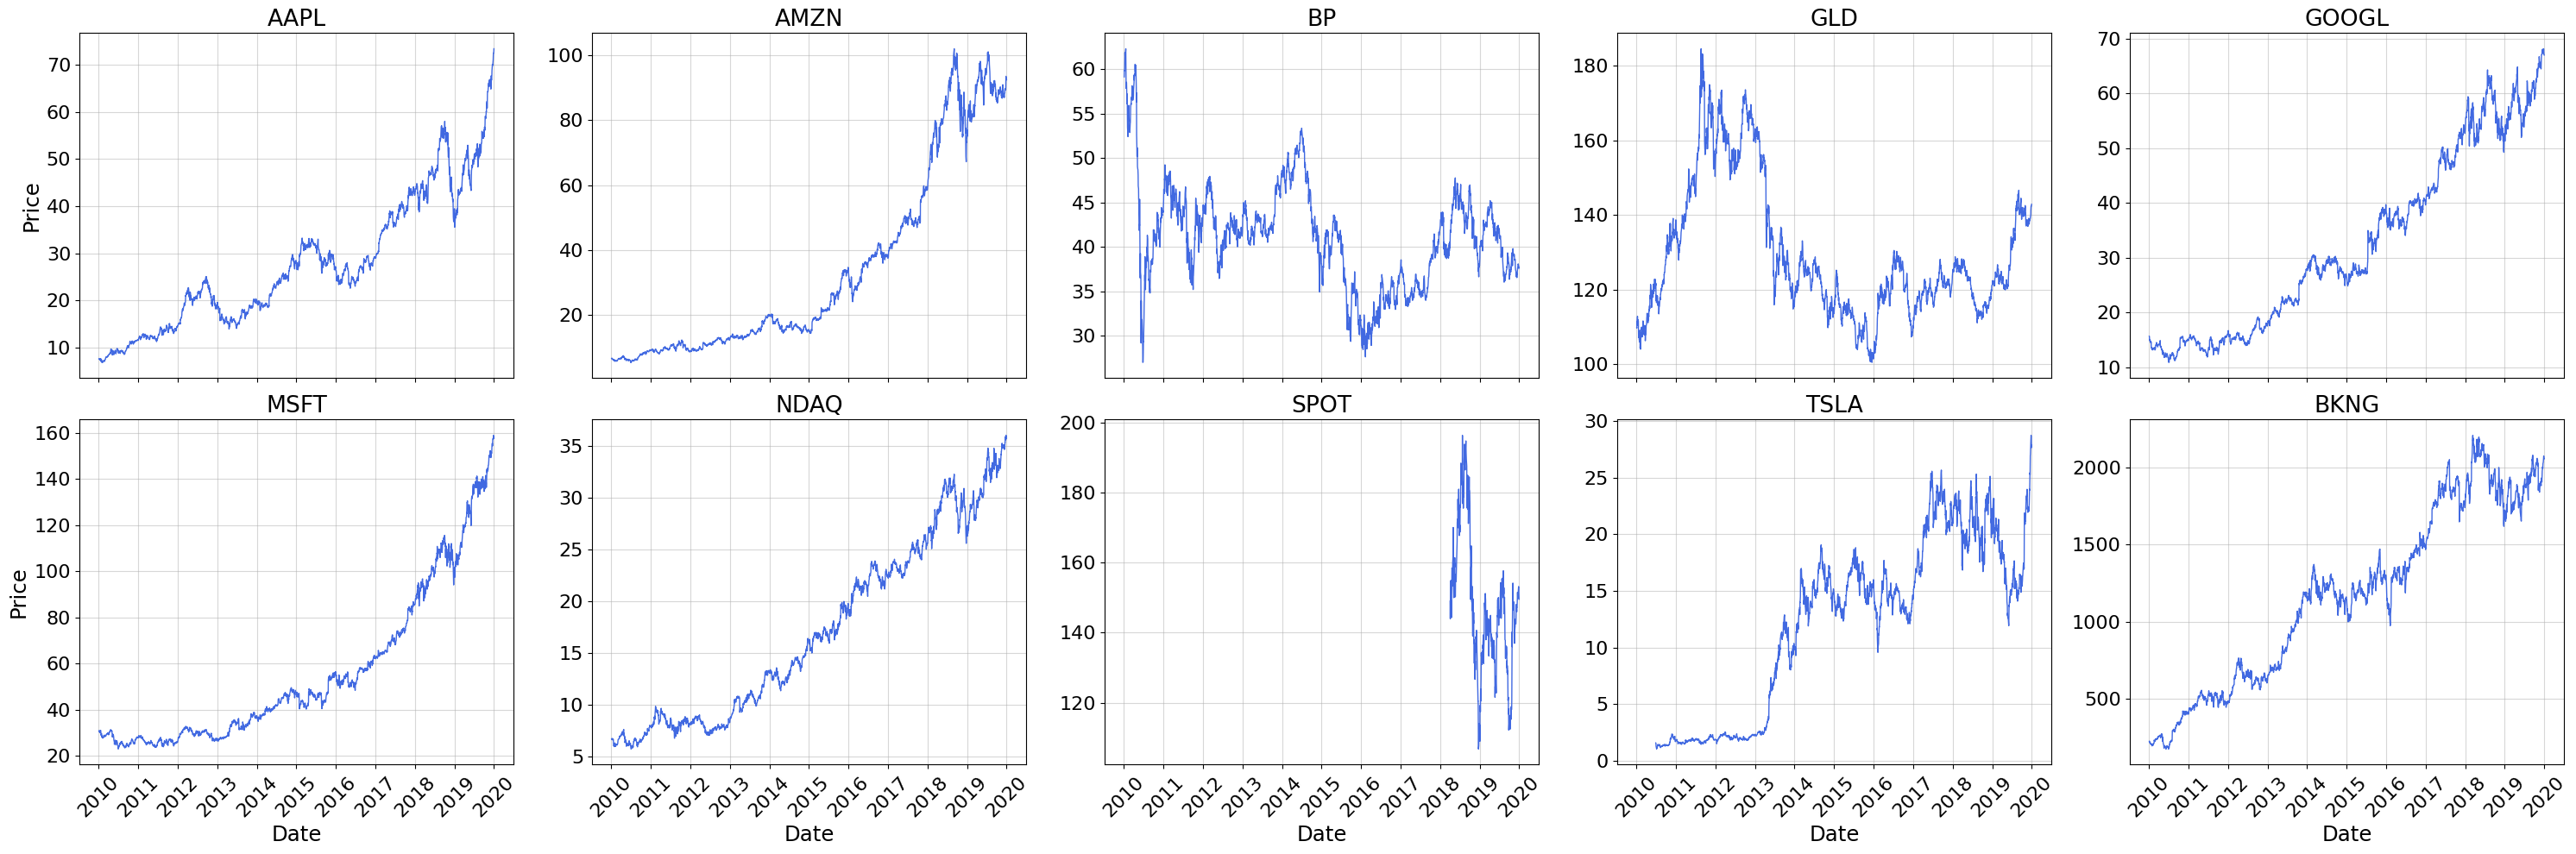

In [ ]:
def plot_stock_subplots(data_list, titles_list, ncols=5, figsize=(30, 10), fontsize=12):
    nrows = -(-len(data_list) // ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize, sharex=True)
    axs = axs.flatten()

    for i, (ax, data, title) in enumerate(zip(axs, data_list, titles_list)):
        ax.plot(data.index, data['Close'], color="royalblue", linewidth=1)
        ax.set_title(title, fontsize=fontsize*1.2)
        ax.grid(True, alpha=0.5)

        if i % ncols == 0:
            ax.set_ylabel('Price', fontsize=fontsize*1.1)

        if i >= (nrows - 1) * ncols:
            ax.set_xlabel('Date', fontsize=fontsize*1.1)

        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.xaxis.set_tick_params(rotation=45)

    plt.tight_layout()
    plt.show()

data_list = [data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG]
titles_list = ['AAPL', 'AMZN', 'BP', 'GLD', 'GOOGL', 'MSFT', 'NDAQ', 'SPOT', 'TSLA', 'BKNG']

plot_stock_subplots(data_list, titles_list, fontsize=16)


## Strategija

 Tą pačią strategiją panaudoti su keliais skirtingais finansiniais instrumentais (pvz. su 10 skirtingų akcijų))

In [ ]:
pd.set_option('mode.chained_assignment', None)

def calculate_bollinger_bands(df, window, std_dev, transaction_costs):
    price_column = "Close"

    df['ma_20'] = df[price_column].rolling(window=window).mean()
    df['std'] = df[price_column].rolling(window=window).std()
    df['upper_band'] = df['ma_20'] + (std_dev * df['std'])
    df['lower_band'] = df['ma_20'] - (std_dev * df['std'])

    df['position_in_future'] = 0
    df.loc[df['Close'] < df['lower_band'], 'position_in_future'] = 1 # pirkimas
    df.loc[df['Close'] > df['upper_band'], 'position_in_future'] = -1 # pardavimas

    df['position'] = df['position_in_future'].shift(1)
    df['position'].iloc[0] = 0
    df['position_change'] = df['position_in_future'] != df['position']

    n = 2
    df['transaction_costs'] = df['position_change'] * transaction_costs * n

    df['price_change'] = df['Close'].diff(1)
    df['price_change'].iloc[0] = 0

    df['profit_from_position'] = df['position'] * df['price_change']
    df['total_profit'] = df['transaction_costs'] + df['profit_from_position']

    return df

def determine_trades(df, stop_loss):
    flag_buy = False
    trades = []
    for idx, day in df.iterrows():
        if (day['position_in_future'] == 1) and (not flag_buy):
            signal = 1
            flag_buy = True
            buy_price = day['Close']
            stop_loss_price = buy_price * (1 - stop_loss)
        elif (day['position_in_future'] == -1) and flag_buy:
            if day['Close'] <= stop_loss_price:
                signal = -2
            else:
                signal = -1
            flag_buy = False
        else:
            signal = 0
        trades.append(signal)

    df['position_signal'] = trades
    return df

window = 20
num_std_dev = 2
transaction_costs = -0.01


data_list = [data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG]
dfs = []
stop_loss = 0.02

for ticker in data_list:
    df = ticker[['Close']].copy()
    df = calculate_bollinger_bands(df, window, num_std_dev, transaction_costs)
    df = determine_trades(df, stop_loss)
    dfs.append(df)


In [ ]:
df.head(60)

Close       ma_20        std  upper_band  lower_band  \
Date                                                                    
2010-01-04  223.960007         NaN        NaN         NaN         NaN   
2010-01-05  226.559998         NaN        NaN         NaN         NaN   
2010-01-06  219.080002         NaN        NaN         NaN         NaN   
2010-01-07  216.130005         NaN        NaN         NaN         NaN   
2010-01-08  216.210007         NaN        NaN         NaN         NaN   
2010-01-11  218.910004         NaN        NaN         NaN         NaN   
2010-01-12  213.979996         NaN        NaN         NaN         NaN   
2010-01-13  214.300003         NaN        NaN         NaN         NaN   
2010-01-14  208.770004         NaN        NaN         NaN         NaN   
2010-01-15  208.770004         NaN        NaN         NaN         NaN   
2010-01-19  208.699997         NaN        NaN         NaN         NaN   
2010-01-20  206.309998         NaN        NaN         NaN         NaN   
2010-01-21  208.039993         NaN        NaN         NaN         NaN   
2010-01-22  204.199997         NaN        NaN         NaN         NaN   
2010-01-25  202.839996         NaN        NaN         NaN         NaN   
2010-01-26  204.440002         NaN        NaN         NaN         NaN   
2010-01-27  207.520004         NaN        NaN         NaN         NaN   
2010-01-28  201.679993         NaN        NaN         NaN         NaN   
2010-01-29  195.350006         NaN        NaN         NaN         NaN   
2010-02-01  204.199997  210.497501   7.940898  226.379297  194.615705   
2010-02-02  204.419998  209.520500   7.379580  224.279659  194.761341   
2010-02-03  208.529999  208.619000   6.194600  221.008200  196.229800   
2010-02-04  200.009995  207.665500   5.962989  219.591477  195.739522   
2010-02-05  196.960007  206.707000   6.070519  218.848038  194.565962   
2010-02-08  200.619995  205.927499   5.780024  217.487547  194.367452   
2010-02-09  205.380005  205.250999   4.906312  215.063624  195.438375   
2010-02-10  206.399994  204.871999   4.469888  213.811776  195.932223   
2010-02-11  208.899994  204.601999   4.009840  212.621680  196.582318   
2010-02-12  207.779999  204.552499   3.961499  212.475497  196.629501   
2010-02-16  211.210007  204.674499   4.132117  212.938732  196.410265   
2010-02-17  212.869995  204.882999   4.439686  213.762371  196.003626   
2010-02-18  232.949997  206.214999   7.693952  221.602903  190.827095   
2010-02-19  230.570007  207.341499   9.428950  226.199399  188.483600   
2010-02-22  229.070007  208.585000  10.564414  229.713828  187.456172   
2010-02-23  225.089996  209.697500  11.086233  231.869966  187.525034   
2010-02-24  225.020004  210.726500  11.519201  233.764901  187.688098   
2010-02-25  223.869995  211.543999  11.854938  235.253875  187.834124   
2010-02-26  226.710007  212.795500  12.077895  236.951291  188.639710   
2010-03-01  238.539993  214.955000  12.642452  240.239904  189.670095   
2010-03-02  241.339996  216.812000  13.665803  244.143606  189.480393   
2010-03-03  235.820007  218.382000  13.967583  246.317166  190.446834   
2010-03-04  233.119995  219.611500  14.135970  247.883440  191.339560   
2010-03-05  235.339996  221.378000  13.760055  248.898111  193.857889   
2010-03-08  240.179993  223.538999  13.101470  249.741938  197.336060   
2010-03-09  238.330002  225.424500  12.319673  250.063845  200.785154   
2010-03-10  240.990005  227.205000  11.833965  250.872930  203.537069   
2010-03-11  242.210007  228.995500  11.213235  251.421970  206.569030   
2010-03-12  238.910004  230.496001  10.357896  251.211792  209.780209   
2010-03-15  238.860001  232.050001   9.014828  250.079658  214.020344   
2010-03-16  241.809998  233.580000   7.807586  249.195173  217.964827   
2010-03-17  242.919998  235.082500   6.371775  247.826051  222.338950   
2010-03-18  242.809998  235.575500   6.576259  248.728019  222.422982   
2010-03-19  239.009995  235.997500   6.508600  249.014700  222.980300   
20

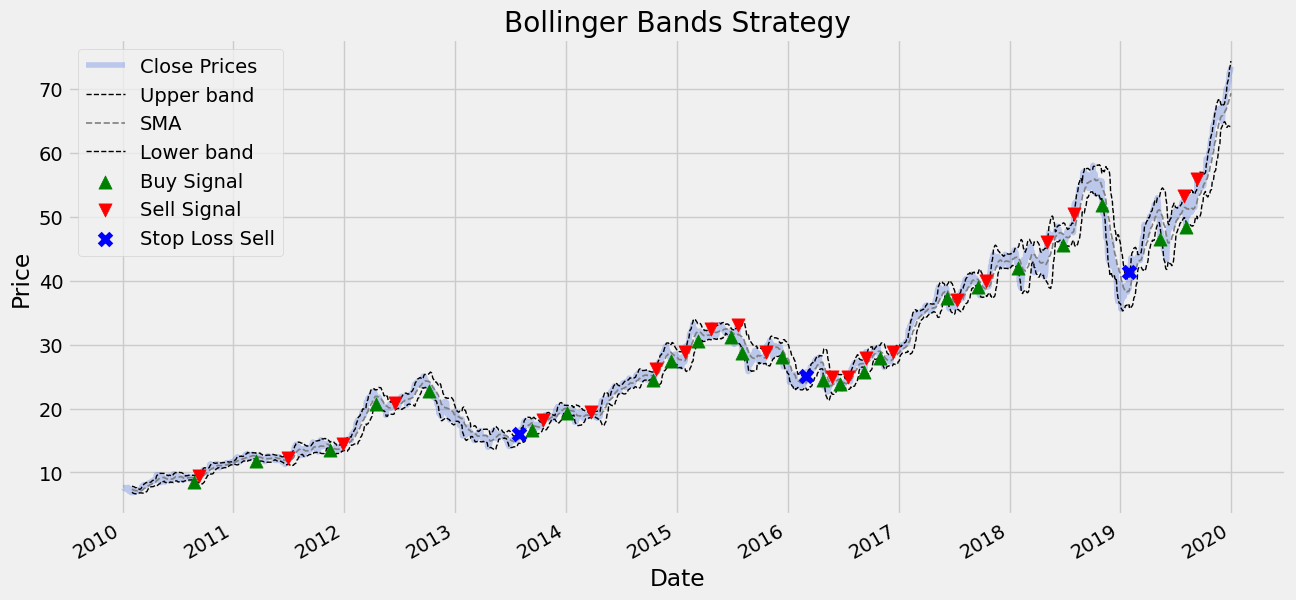

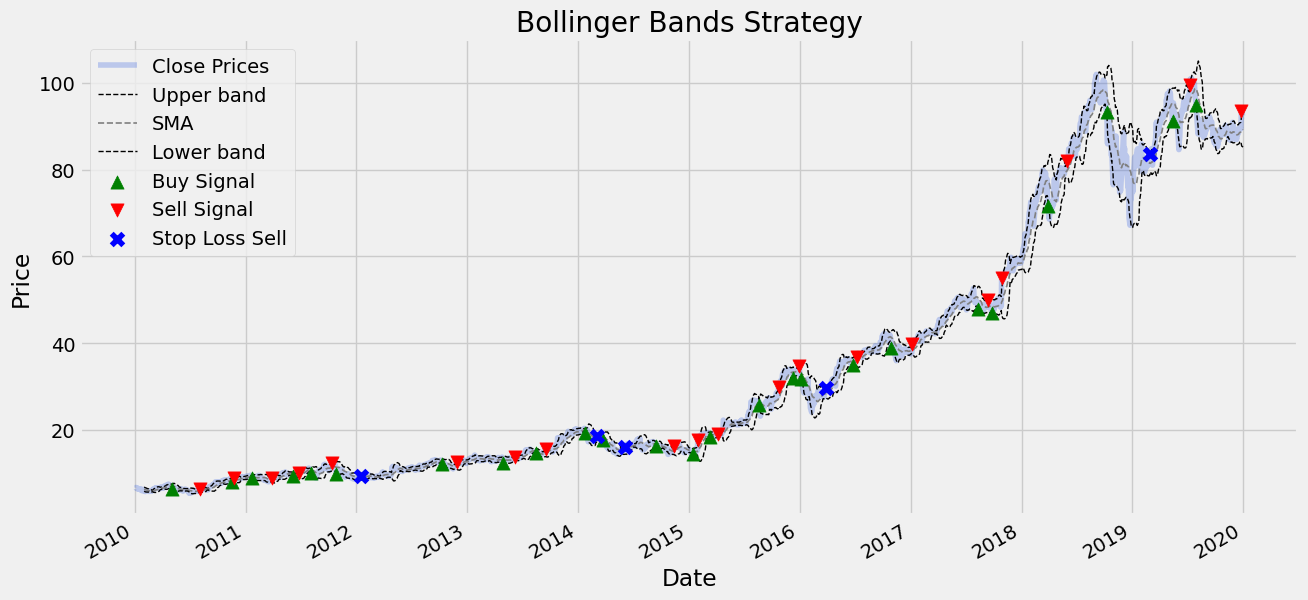

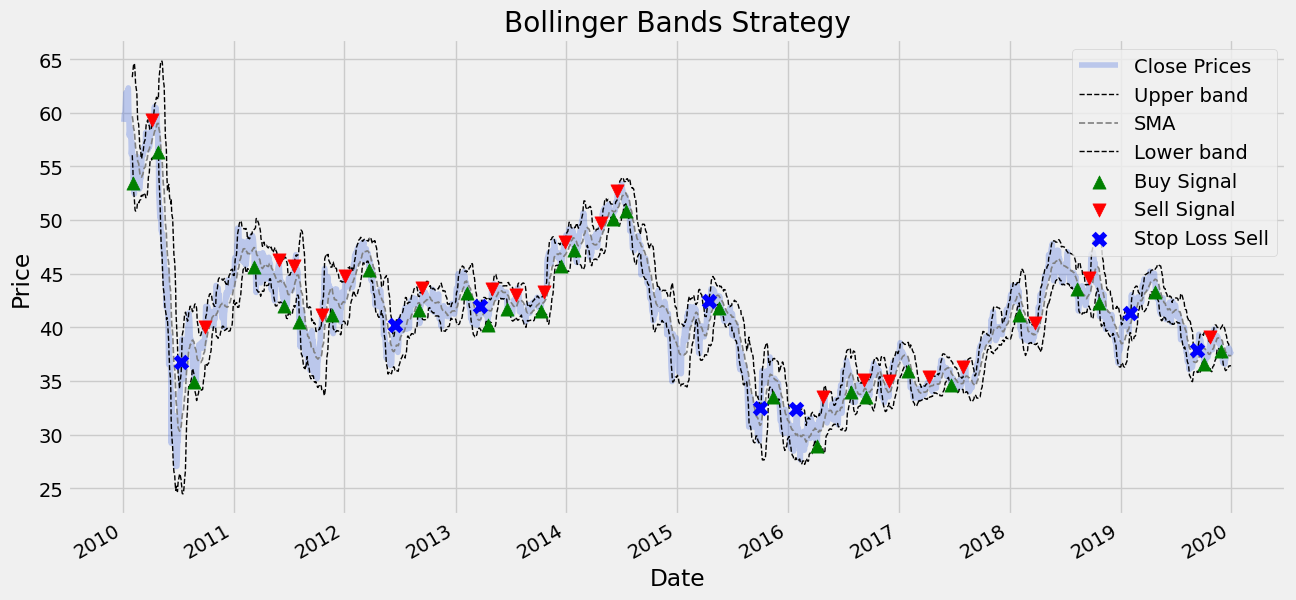

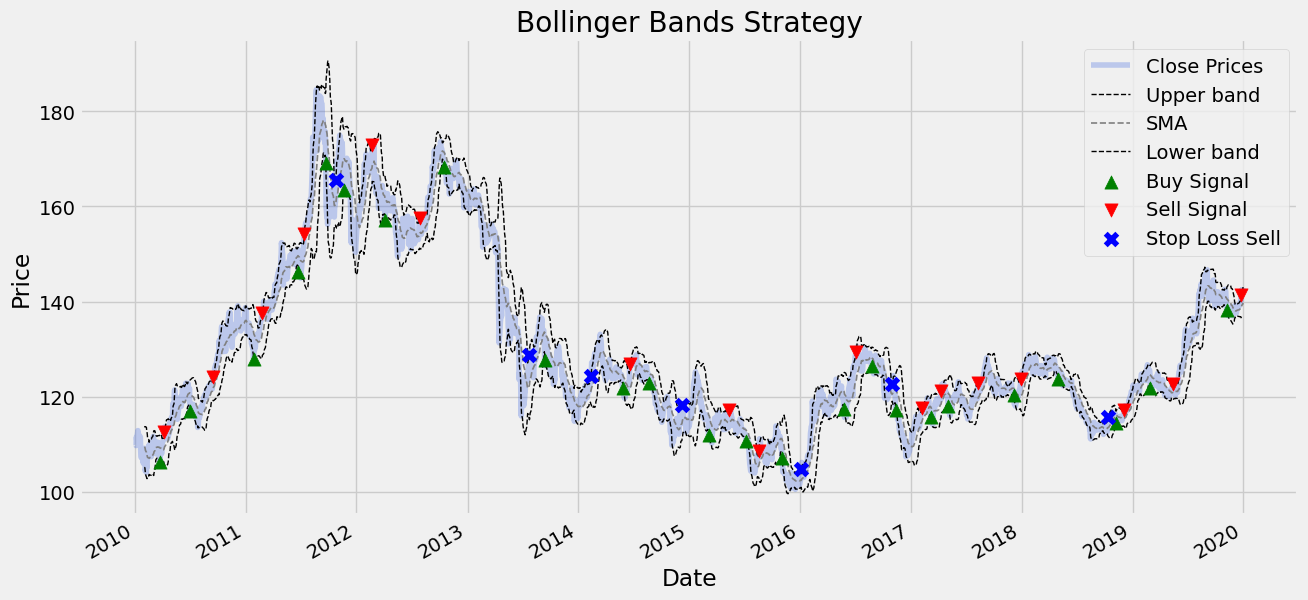

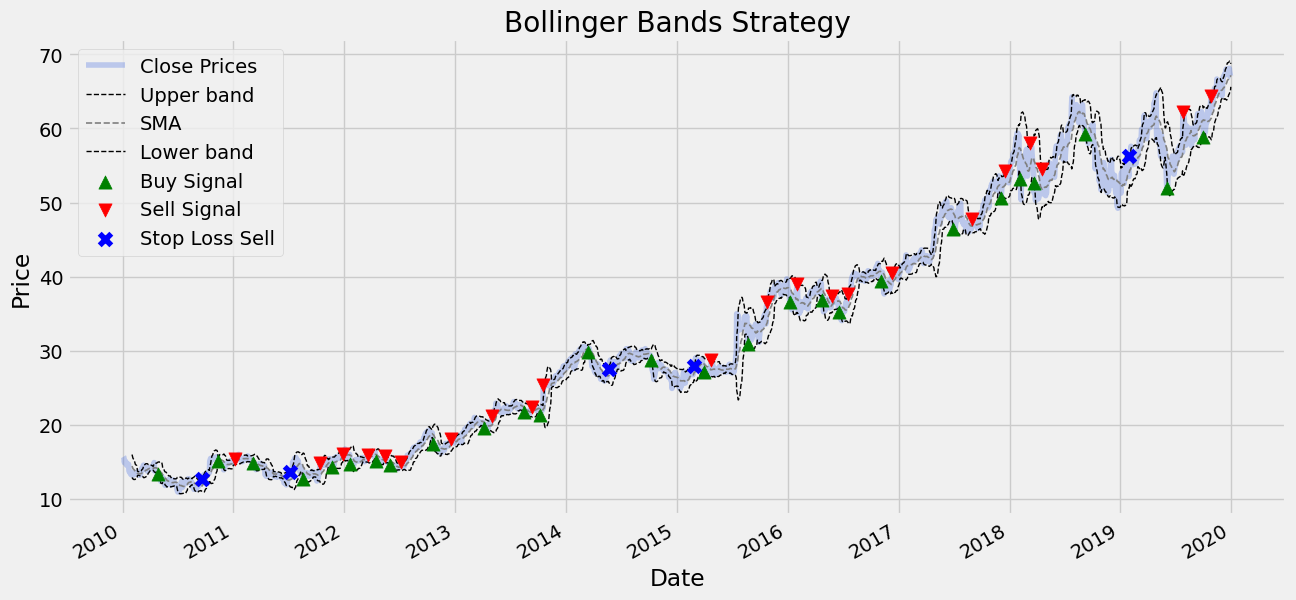

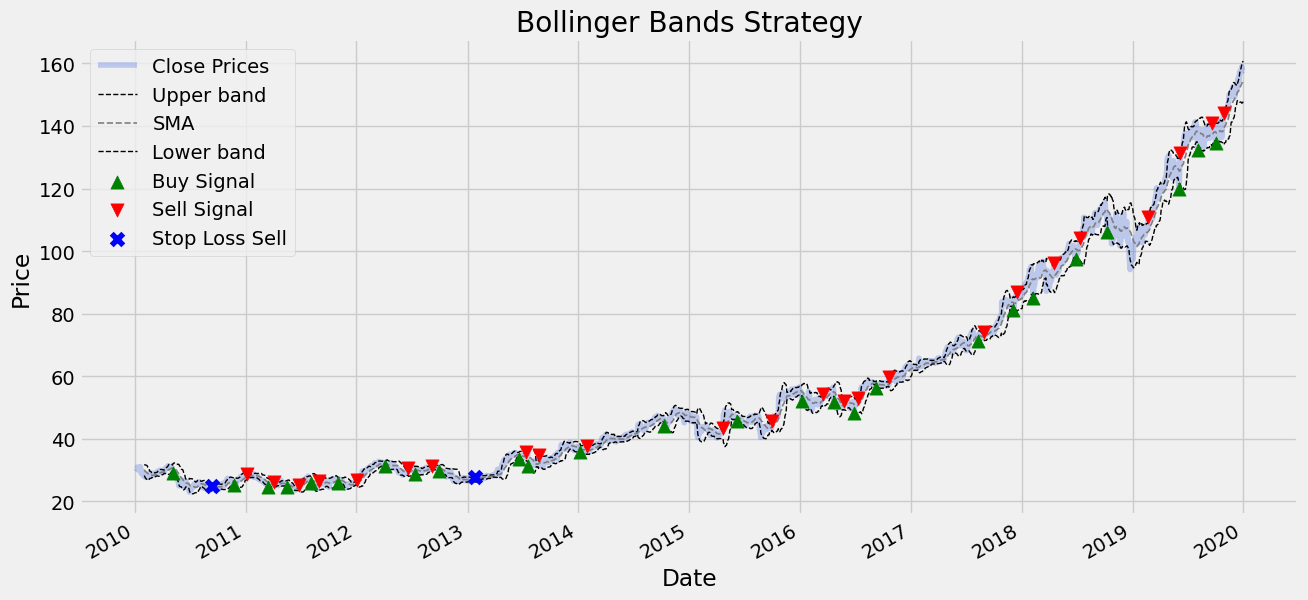

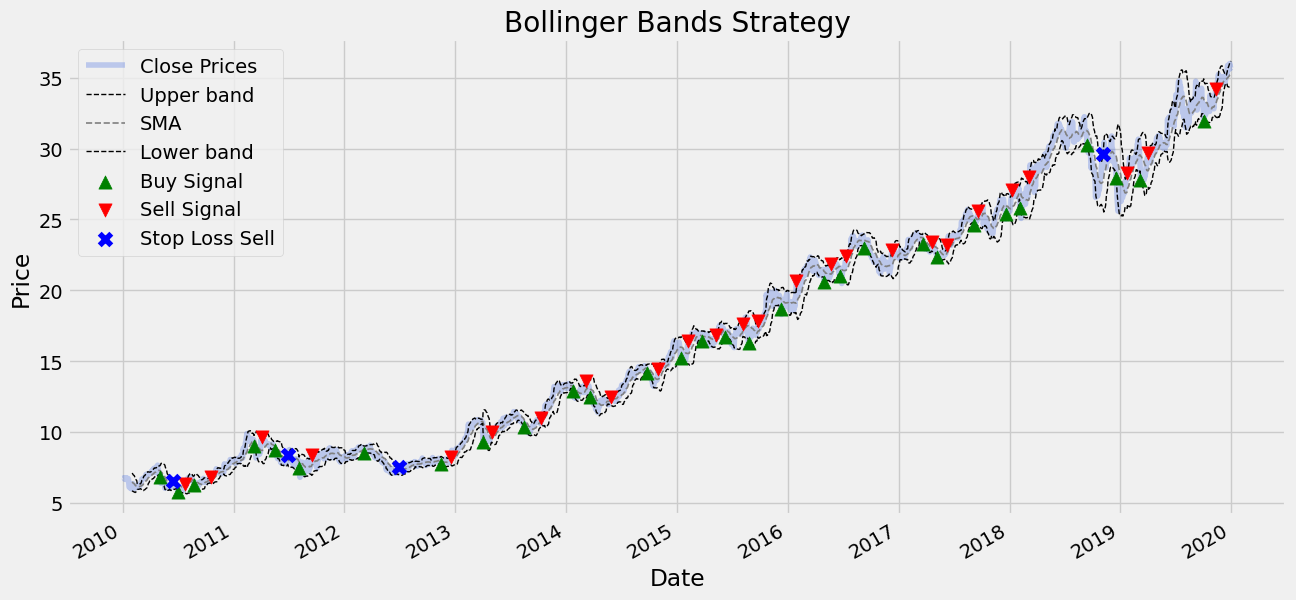

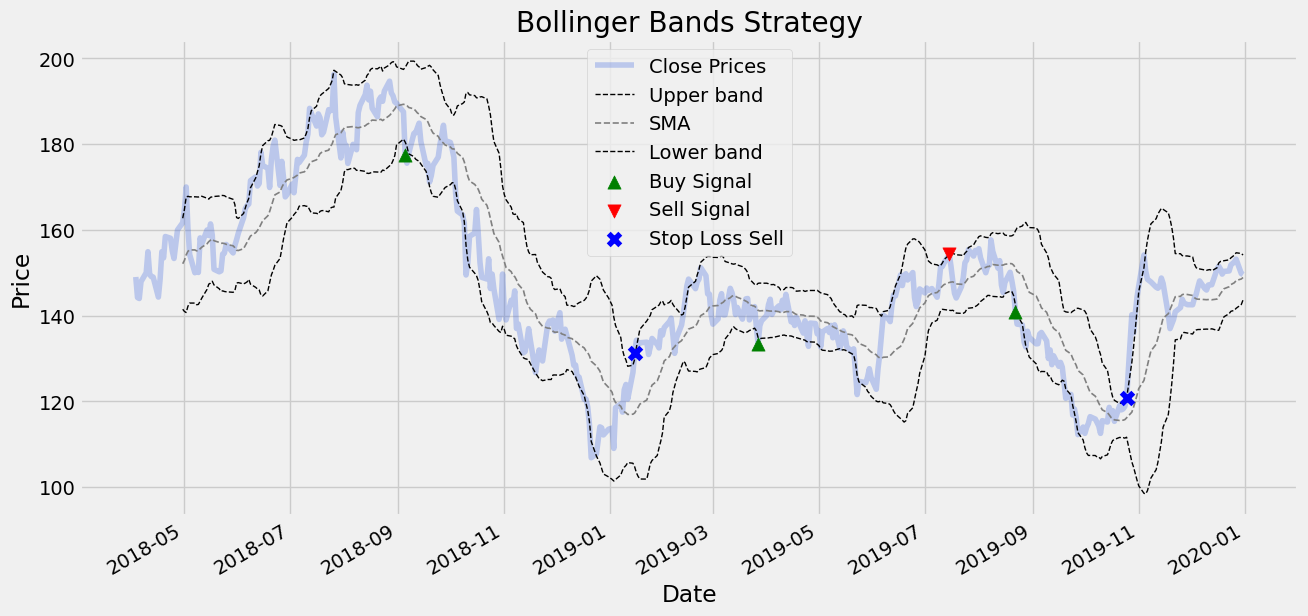

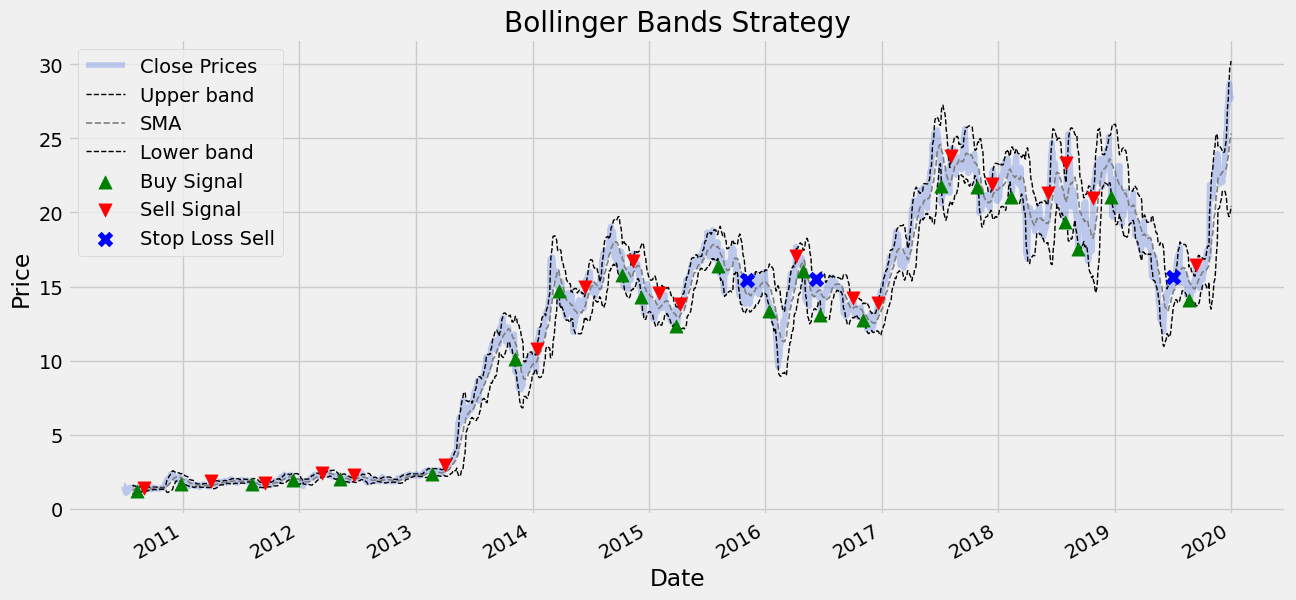

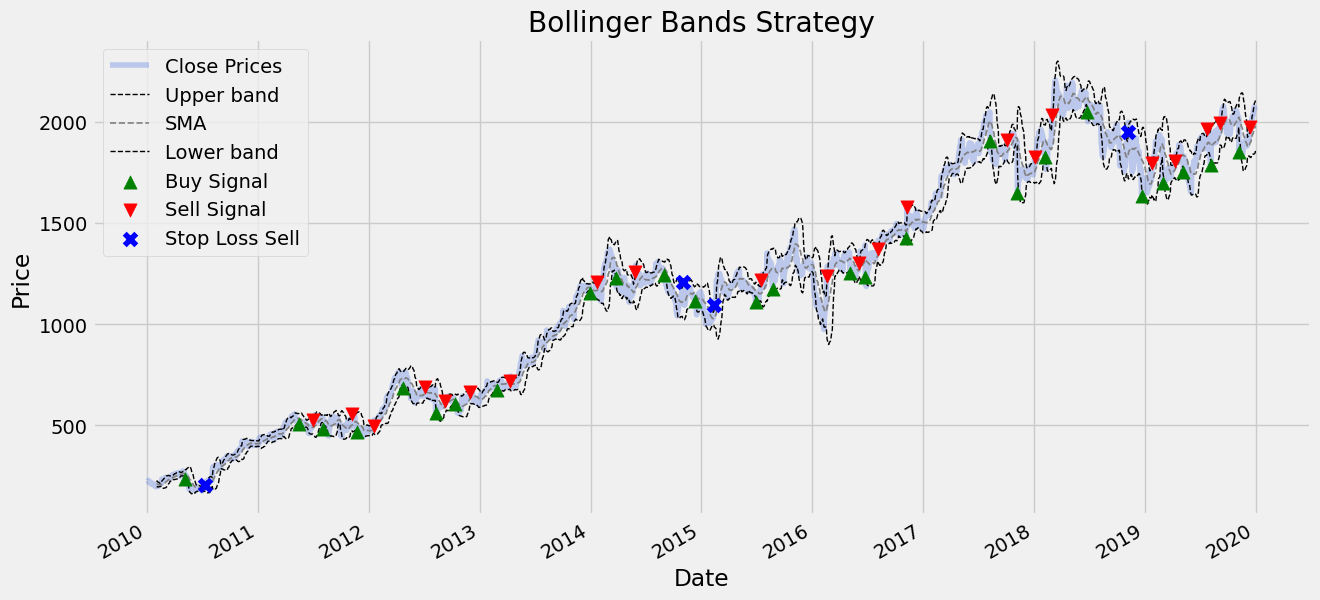

In [ ]:
def plot_bollinger_bands(df):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(14, 7))

    df['Close'].plot(label='Close Prices', alpha=0.3, color='royalblue')
    df['upper_band'].plot(label='Upper band', linestyle='--', linewidth=1, color='black')
    df['ma_20'].plot(label='SMA', linestyle='--', linewidth=1.2, color='grey')
    df['lower_band'].plot(label='Lower band', linestyle='--', linewidth=1, color='black')

    plt.scatter(df.index[df['position_signal'] == 1], df['Close'][df['position_signal'] == 1], marker='^', color='g', label='Buy Signal', s=90, zorder=3)
    plt.scatter(df.index[df['position_signal'] == -1], df['Close'][df['position_signal'] == -1], marker='v', color='r', label='Sell Signal', s=90, zorder=3)
    plt.scatter(df.index[df['position_signal'] == -2], df['Close'][df['position_signal'] == -2], marker='x', color='b', label='Stop Loss Sell', s=70, zorder=3)

    plt.title('Bollinger Bands Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

for df in dfs:
    plot_bollinger_bands(df)


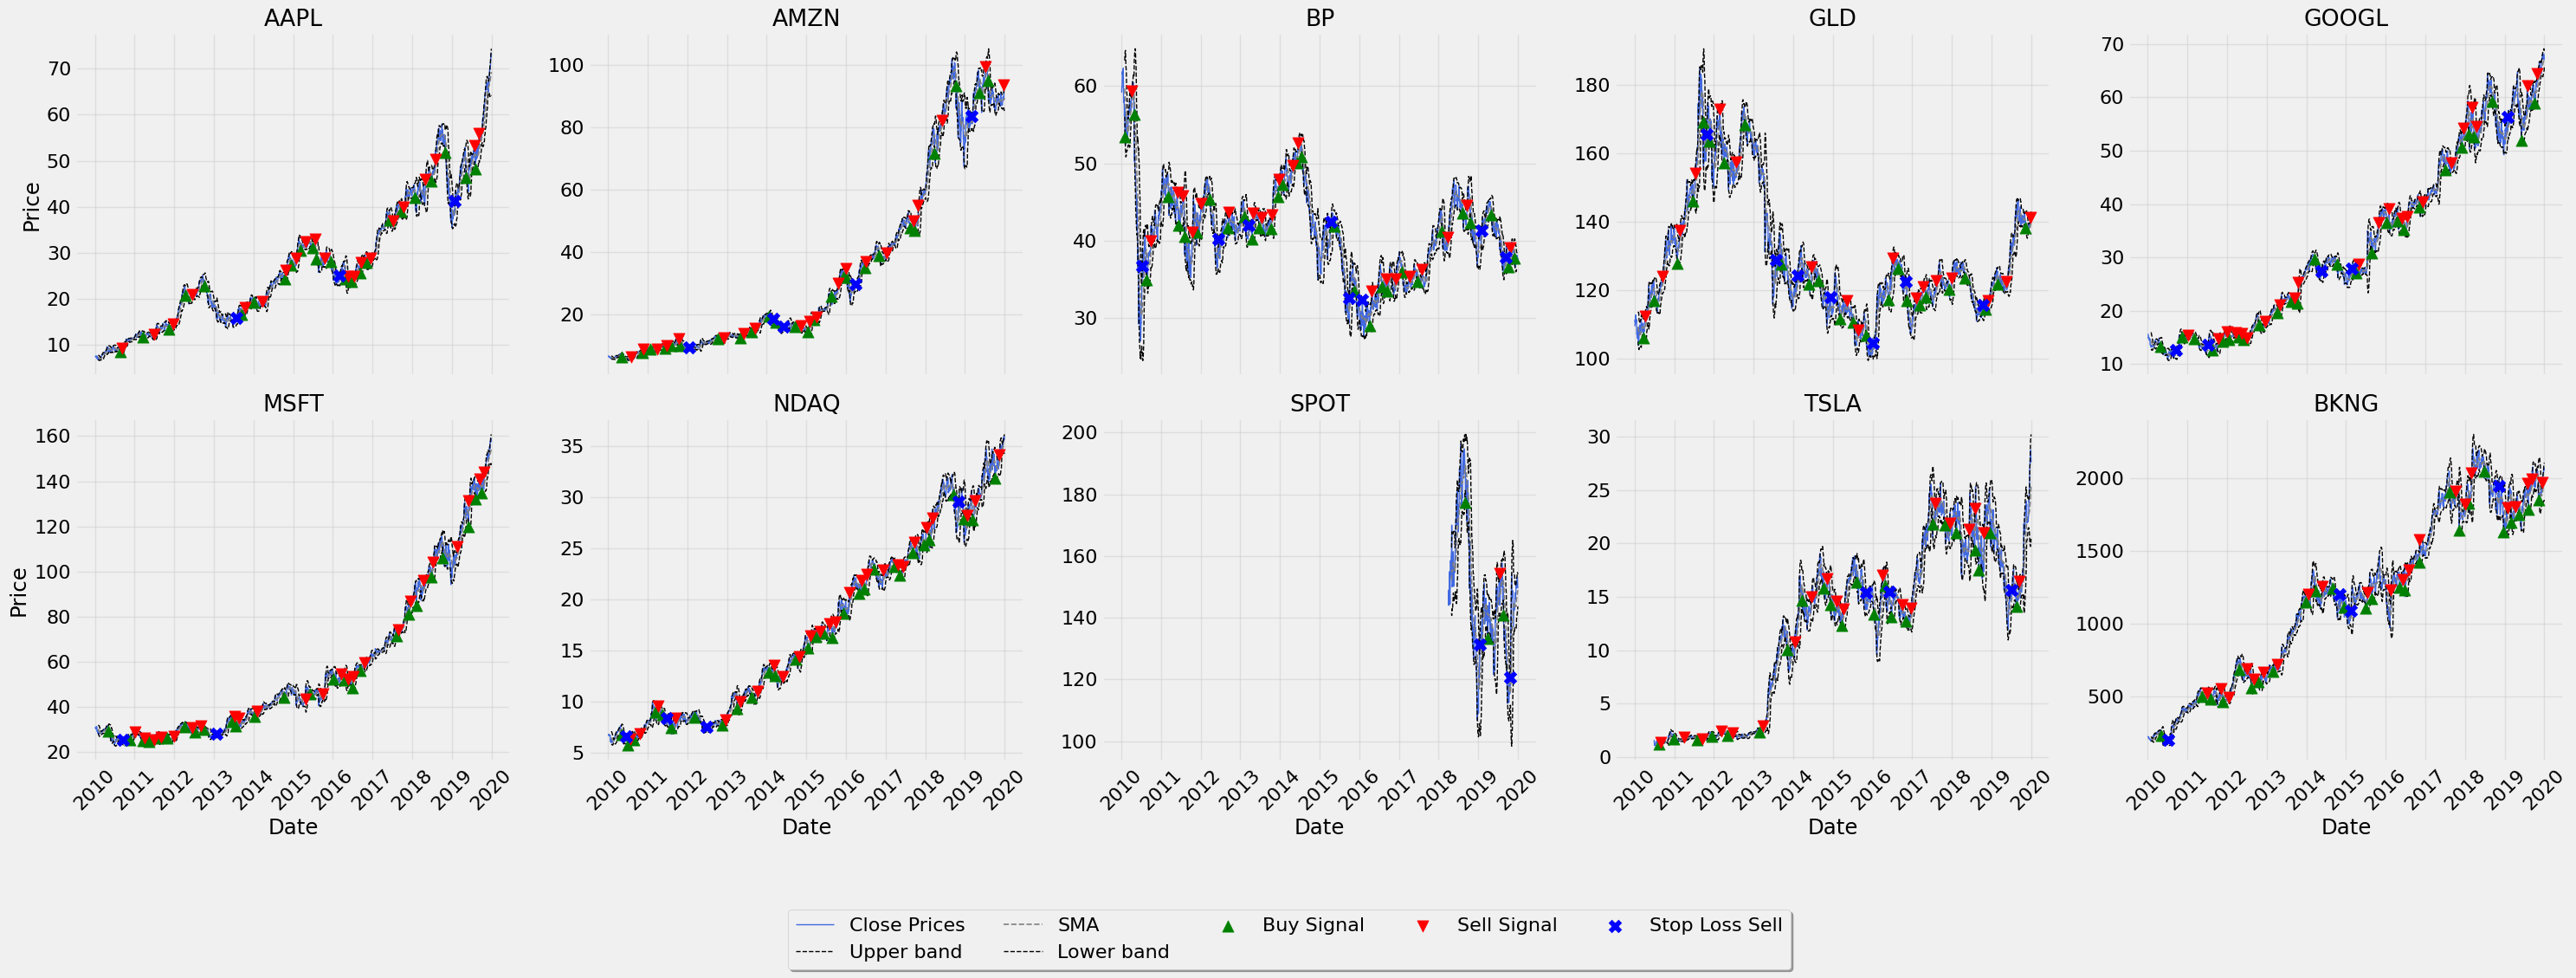

In [ ]:
import matplotlib.pyplot as plt

def plot_stock_subplots(data_list, titles_list, ncols=5, figsize=(30, 10), fontsize=12):
    nrows = -(-len(data_list) // ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize, sharex=True)
    axs = axs.flatten()

    for i, (ax, data, title) in enumerate(zip(axs, data_list, titles_list)):
        ax.plot(data.index, data['Close'], color="royalblue", linewidth=1, label='Close Prices')
        ax.plot(data.index, data['upper_band'], label='Upper band', linestyle='--', linewidth=1, color='black')
        ax.plot(data.index, data['ma_20'], label='SMA', linestyle='--', linewidth=1.2, color='grey')
        ax.plot(data.index, data['lower_band'], label='Lower band', linestyle='--', linewidth=1, color='black')

        ax.scatter(data.index[data['position_signal'] == 1], data['Close'][data['position_signal'] == 1], marker='^', color='g', label='Buy Signal', s=90, zorder=3)
        ax.scatter(data.index[data['position_signal'] == -1], data['Close'][data['position_signal'] == -1], marker='v', color='r', label='Sell Signal', s=90, zorder=3)
        ax.scatter(data.index[data['position_signal'] == -2], data['Close'][data['position_signal'] == -2], marker='x', color='b', label='Stop Loss Sell', s=70, zorder=3)

        ax.set_title(title, fontsize=fontsize*1.2)
        ax.grid(True, alpha=0.5)

        if i % ncols == 0:
            ax.set_ylabel('Price', fontsize=fontsize*1.1)

        if i >= (nrows - 1) * ncols:
            ax.set_xlabel('Date', fontsize=fontsize*1.1)

        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.xaxis.set_tick_params(rotation=45)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, fontsize=fontsize, ncol=5)

    plt.tight_layout()
    plt.show()

# titles_list = ['AAPL', 'AMZN', 'BP', 'GLD', 'GOOGL', 'MSFT', 'NDAQ', 'SPOT', 'TSLA', 'BKNG']
# dfs = [data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG]

plot_stock_subplots(dfs, titles_list, fontsize=16)  # Adjust fontsize as needed


## Strategijos optimizavimas

In [ ]:
def calculate_sharpe_ratio(returns, N=252):
    sharpe_ratio = np.sqrt(N) * (returns.mean() / returns.std())
    return sharpe_ratio

def optimize_strategy(data, window_range, std_dev_range, transaction_costs_range, stop_loss):
    best_sharpe_ratio = -np.inf
    optimal_params = {}

    for window in window_range:
        for std_dev in std_dev_range:
            for transaction_costs in transaction_costs_range:
                df = data[['Close']].copy()
                df = calculate_bollinger_bands(df, window, std_dev, transaction_costs)
                df = determine_trades(df, stop_loss)
                cumulative_profit = df['total_profit'].cumsum()
                returns = df['total_profit']
                sharpe_ratio = calculate_sharpe_ratio(returns)

                if sharpe_ratio > best_sharpe_ratio:
                    best_sharpe_ratio = sharpe_ratio
                    optimal_params = {'window': window, 'std_dev': std_dev, 'transaction_costs': transaction_costs}
                    optimal_cumulative_profit = cumulative_profit

    return optimal_params, best_sharpe_ratio, optimal_cumulative_profit

window_range = range(27, 31, 5)
std_dev_range = [1, 1.5, 2, 2.5, 3]
transaction_costs_range = [-0.01, -0.005, 0, 0.005, 0.01]

all_optimal_params = []
all_sharpe_ratios = []
all_cumulative_profits = []

for data, ticker in zip(data_list, tickers):
    optimal_params, sharpe_ratio, cumulative_profit = optimize_strategy(data, window_range, std_dev_range, transaction_costs_range, stop_loss)
    all_optimal_params.append(optimal_params)
    all_sharpe_ratios.append(sharpe_ratio)
    all_cumulative_profits.append(cumulative_profit)

    print("Ticker:", ticker)
    print("Best parameters for maximum Sharpe ratio:", optimal_params)
    print("Sharpe Ratio (Optimized):", sharpe_ratio)

    df_non_optimized = data[['Close']].copy()
    rez_non_optimized = calculate_bollinger_bands(df_non_optimized, 20, 2, -0.01)
    df_non_optimized = determine_trades(df_non_optimized, stop_loss)
    non_optimal_cumulative_profit = df_non_optimized['total_profit'].cumsum()

    returns_non_optimized = df_non_optimized['total_profit']
    sharpe_ratio_non_optimized = calculate_sharpe_ratio(returns_non_optimized)

    print("Sharpe Ratio (Non-Optimized):", sharpe_ratio_non_optimized)
    print()

Ticker: AAPL
Best parameters for maximum Sharpe ratio: {'window': 27, 'std_dev': 2.5, 'transaction_costs': 0.01}
Sharpe Ratio (Optimized): 0.4003753429532361
Sharpe Ratio (Non-Optimized): -0.38559199309988273

Ticker: AMZN
Best parameters for maximum Sharpe ratio: {'window': 27, 'std_dev': 2, 'transaction_costs': 0.01}
Sharpe Ratio (Optimized): 0.4262965555914257
Sharpe Ratio (Non-Optimized): -0.03459386705860903

Ticker: BP
Best parameters for maximum Sharpe ratio: {'window': 27, 'std_dev': 2.5, 'transaction_costs': 0.01}
Sharpe Ratio (Optimized): 0.5758020109806423
Sharpe Ratio (Non-Optimized): -0.19527886118515667

Ticker: GLD
Best parameters for maximum Sharpe ratio: {'window': 27, 'std_dev': 1, 'transaction_costs': 0.01}
Sharpe Ratio (Optimized): 0.030057737558757597
Sharpe Ratio (Non-Optimized): -0.467045701931738

Ticker: GOOGL
Best parameters for maximum Sharpe ratio: {'window': 27, 'std_dev': 2, 'transaction_costs': 0.01}
Sharpe Ratio (Optimized): 0.5890133984053678
Sharpe Rat

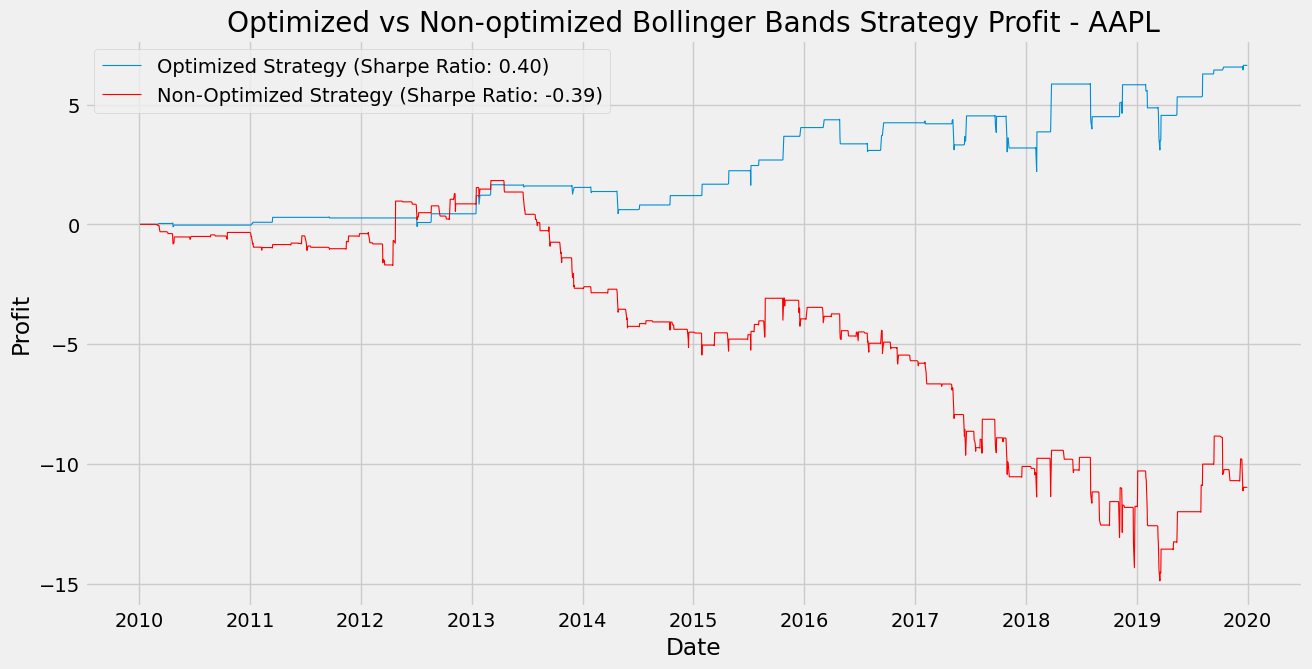

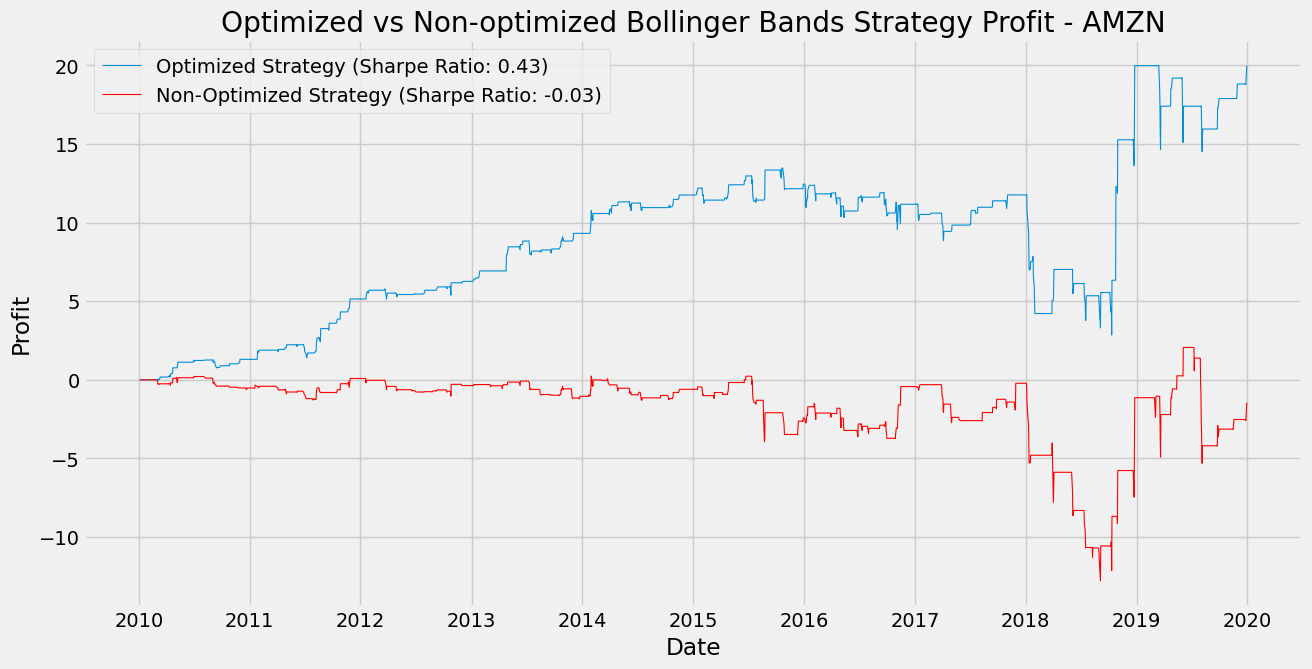

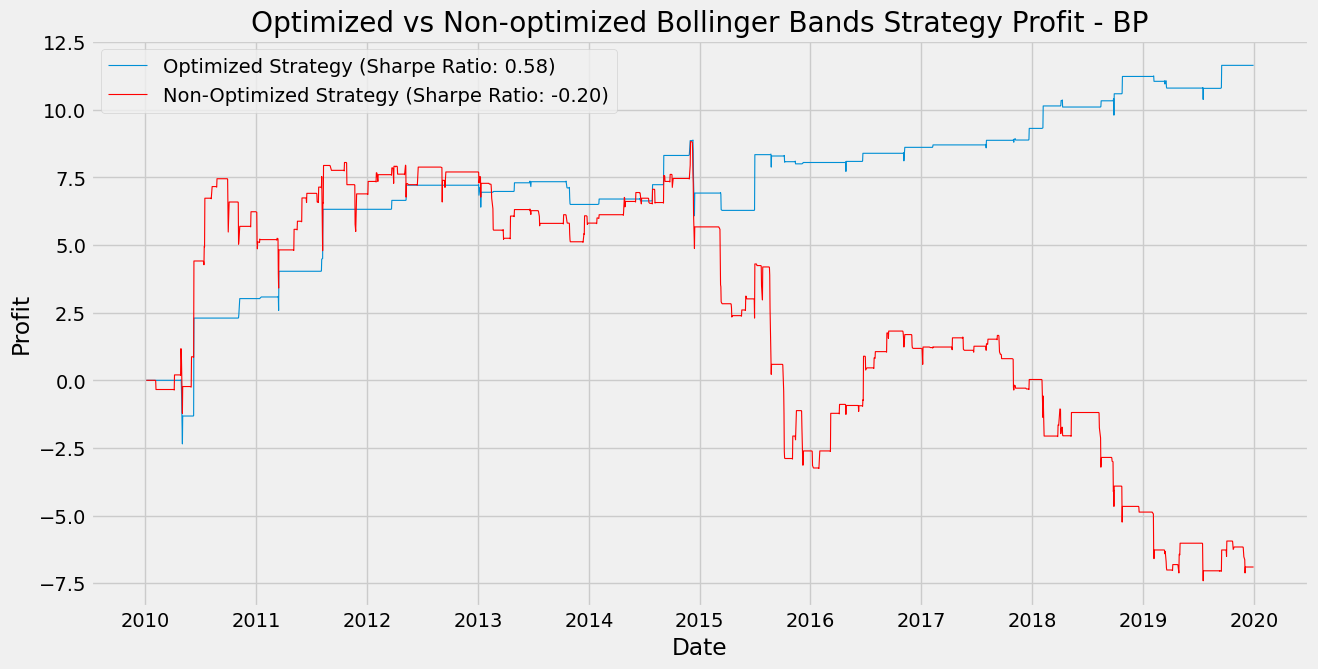

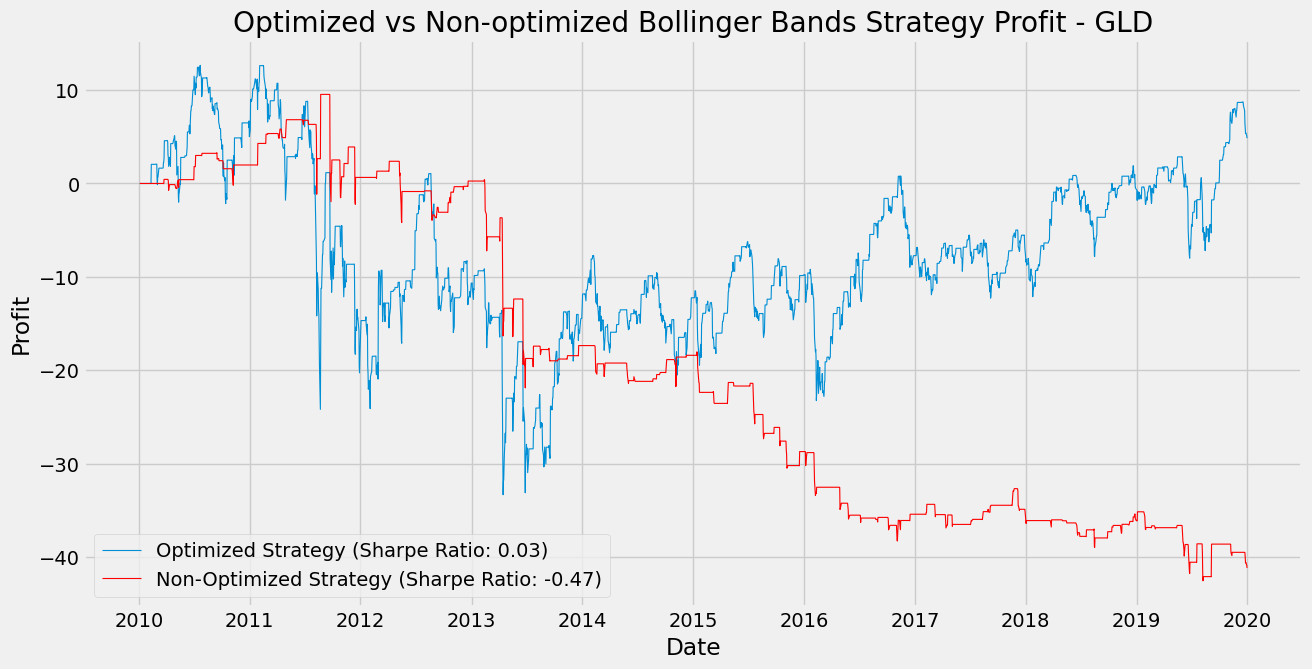

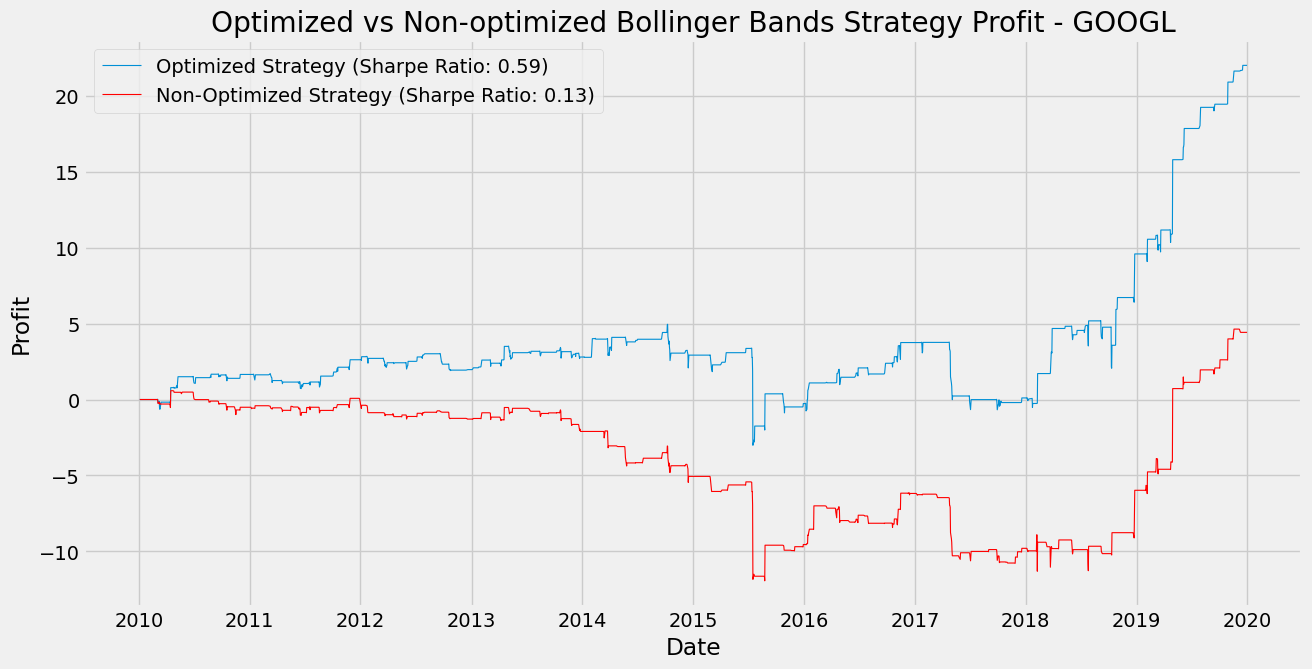

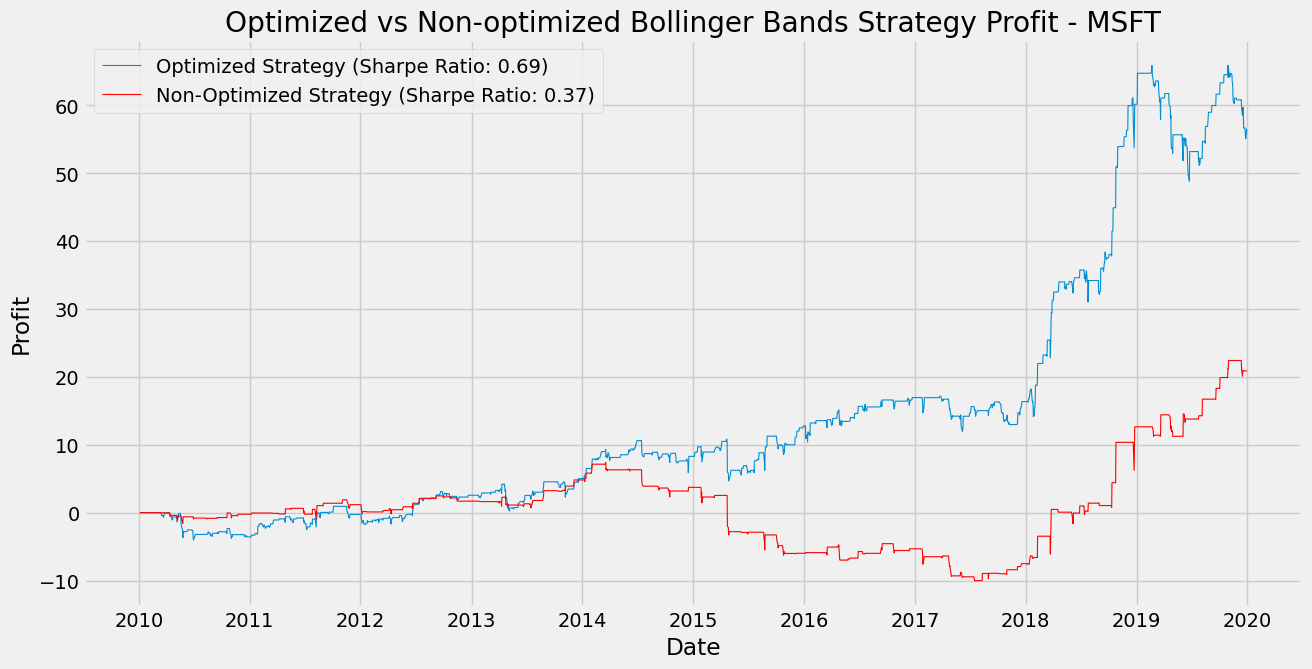

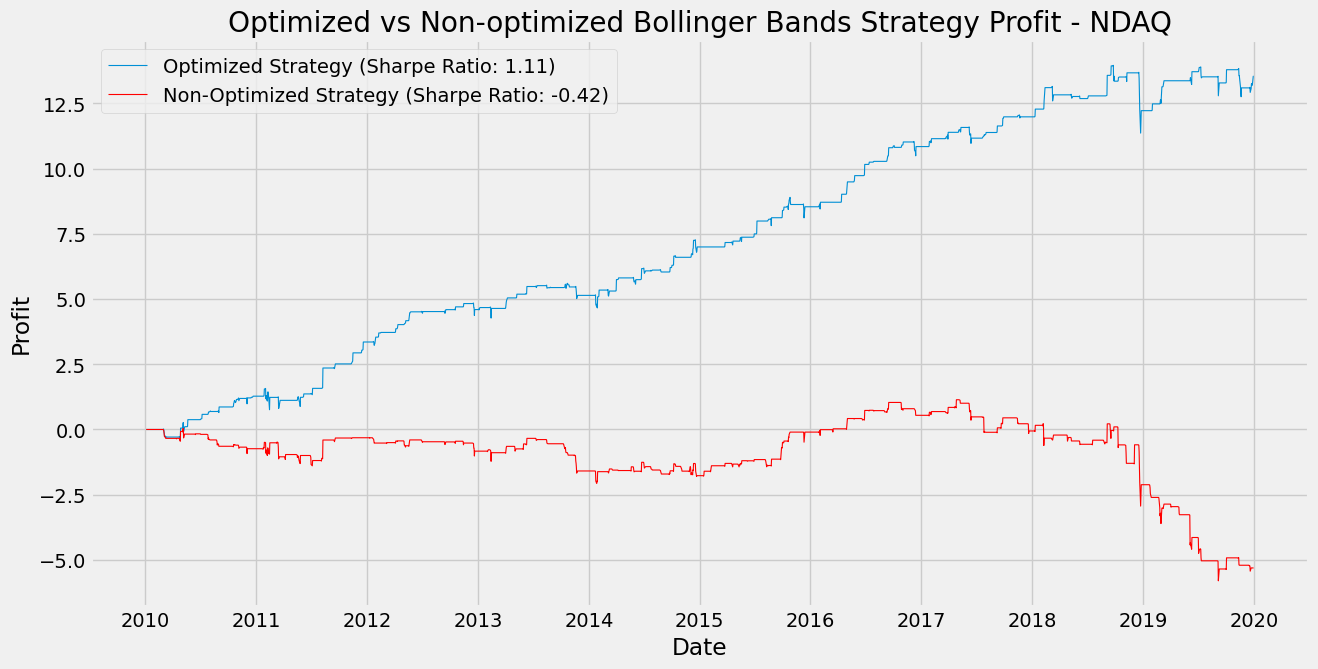

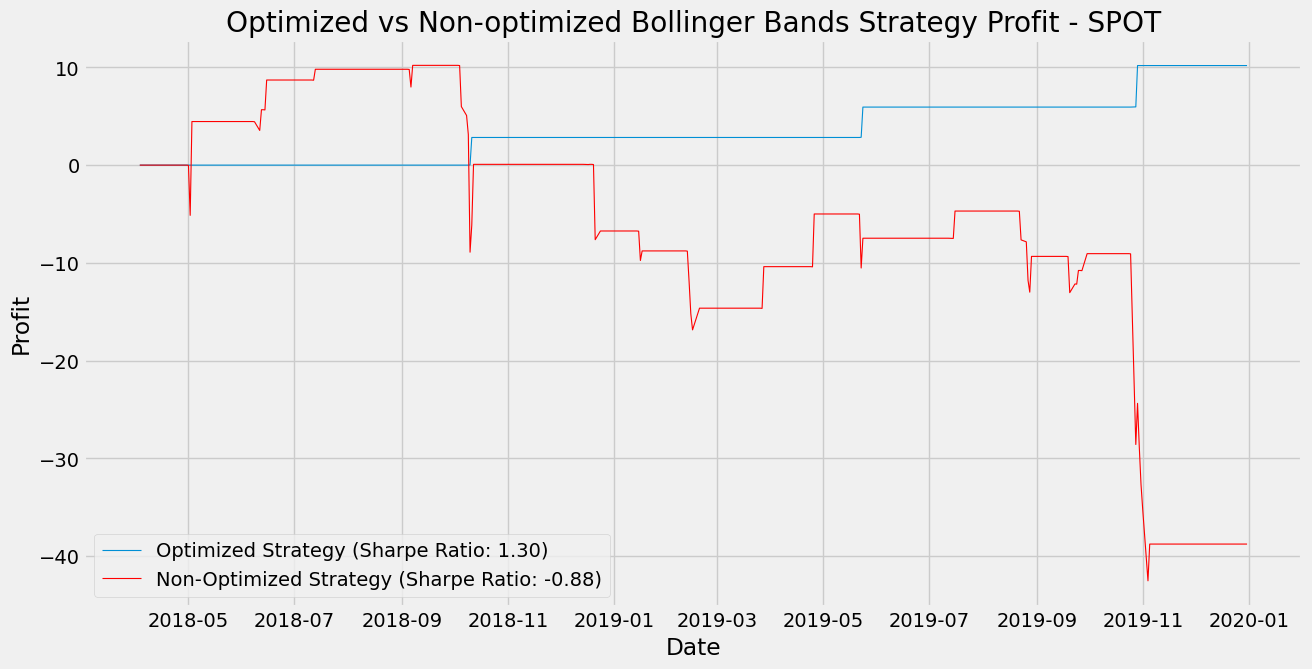

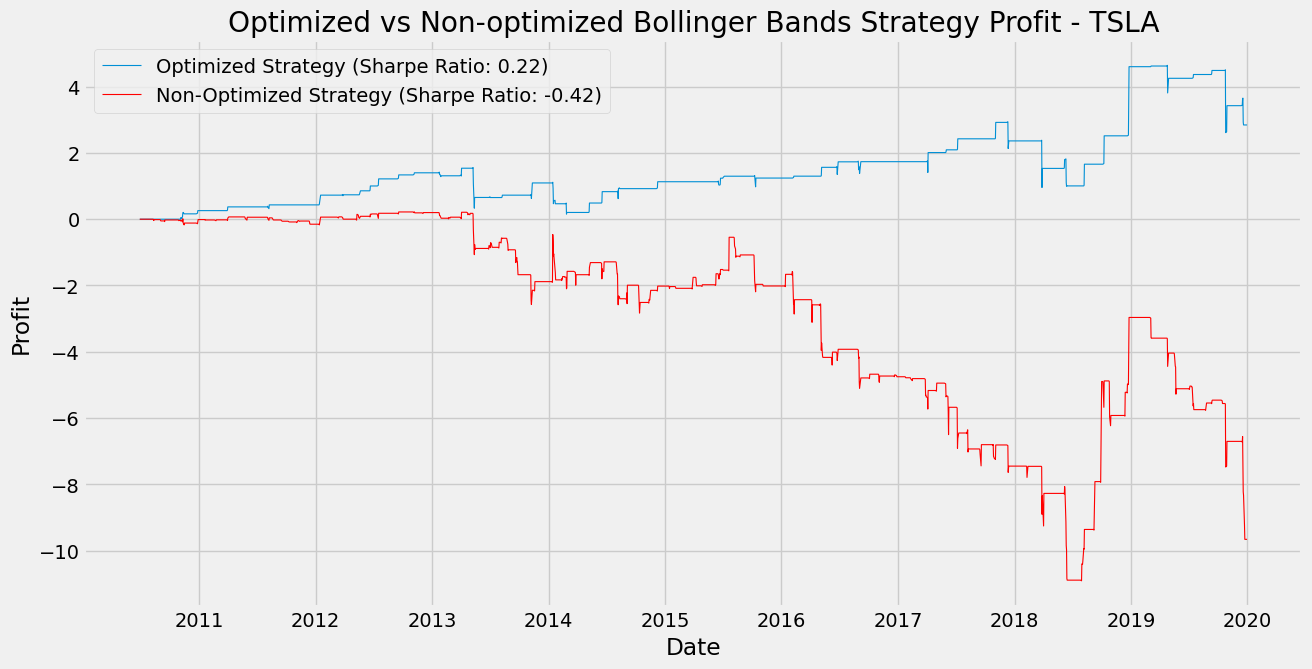

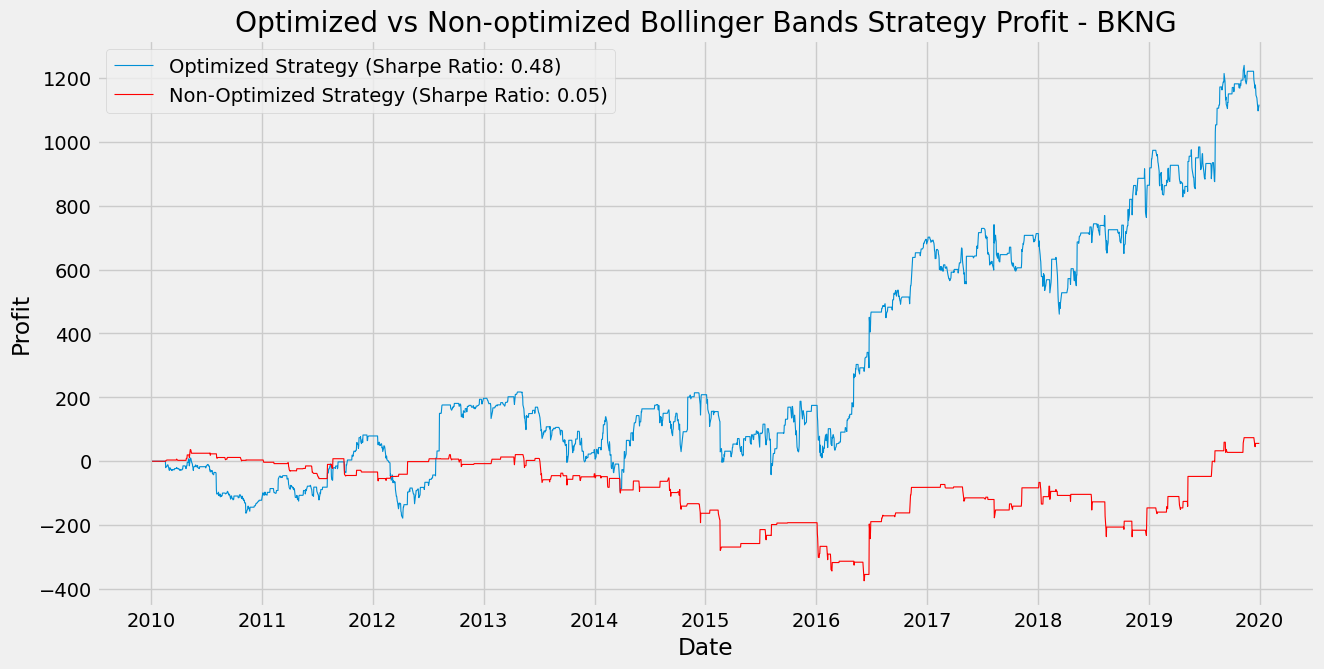

In [ ]:
import matplotlib.pyplot as plt

def plot_strategy_comparison(data_list, tickers, all_optimal_params, all_sharpe_ratios, all_cumulative_profits):
    for data, ticker, optimal_params, best_sharpe_ratio, cumulative_profit, sharpe_ratio in zip(data_list, tickers, all_optimal_params, all_sharpe_ratios, all_cumulative_profits, all_sharpe_ratios):
        plt.figure(figsize=(14, 7))

        plt.plot(cumulative_profit, label='Optimized Strategy (Sharpe Ratio: {:.2f})'.format(best_sharpe_ratio), lw=0.8)

        df_non_optimized = data[['Close']].copy()
        rez_non_optimized = calculate_bollinger_bands(df_non_optimized, 20, 2, -0.01)
        df_non_optimized = determine_trades(df_non_optimized, stop_loss)  # Pass stop_loss
        non_optimal_cumulative_profit = df_non_optimized['total_profit'].cumsum()

        non_optimal_returns = df_non_optimized['total_profit']
        non_optimal_sharpe_ratio = calculate_sharpe_ratio(non_optimal_returns)

        plt.plot(non_optimal_cumulative_profit, label='Non-Optimized Strategy (Sharpe Ratio: {:.2f})'.format(non_optimal_sharpe_ratio), lw=0.8, color='red')

        plt.title('Optimized vs Non-optimized Bollinger Bands Strategy Profit - {}'.format(ticker))
        plt.xlabel('Date')
        plt.ylabel('Profit')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_strategy_comparison(data_list, tickers, all_optimal_params, all_sharpe_ratios, all_cumulative_profits)


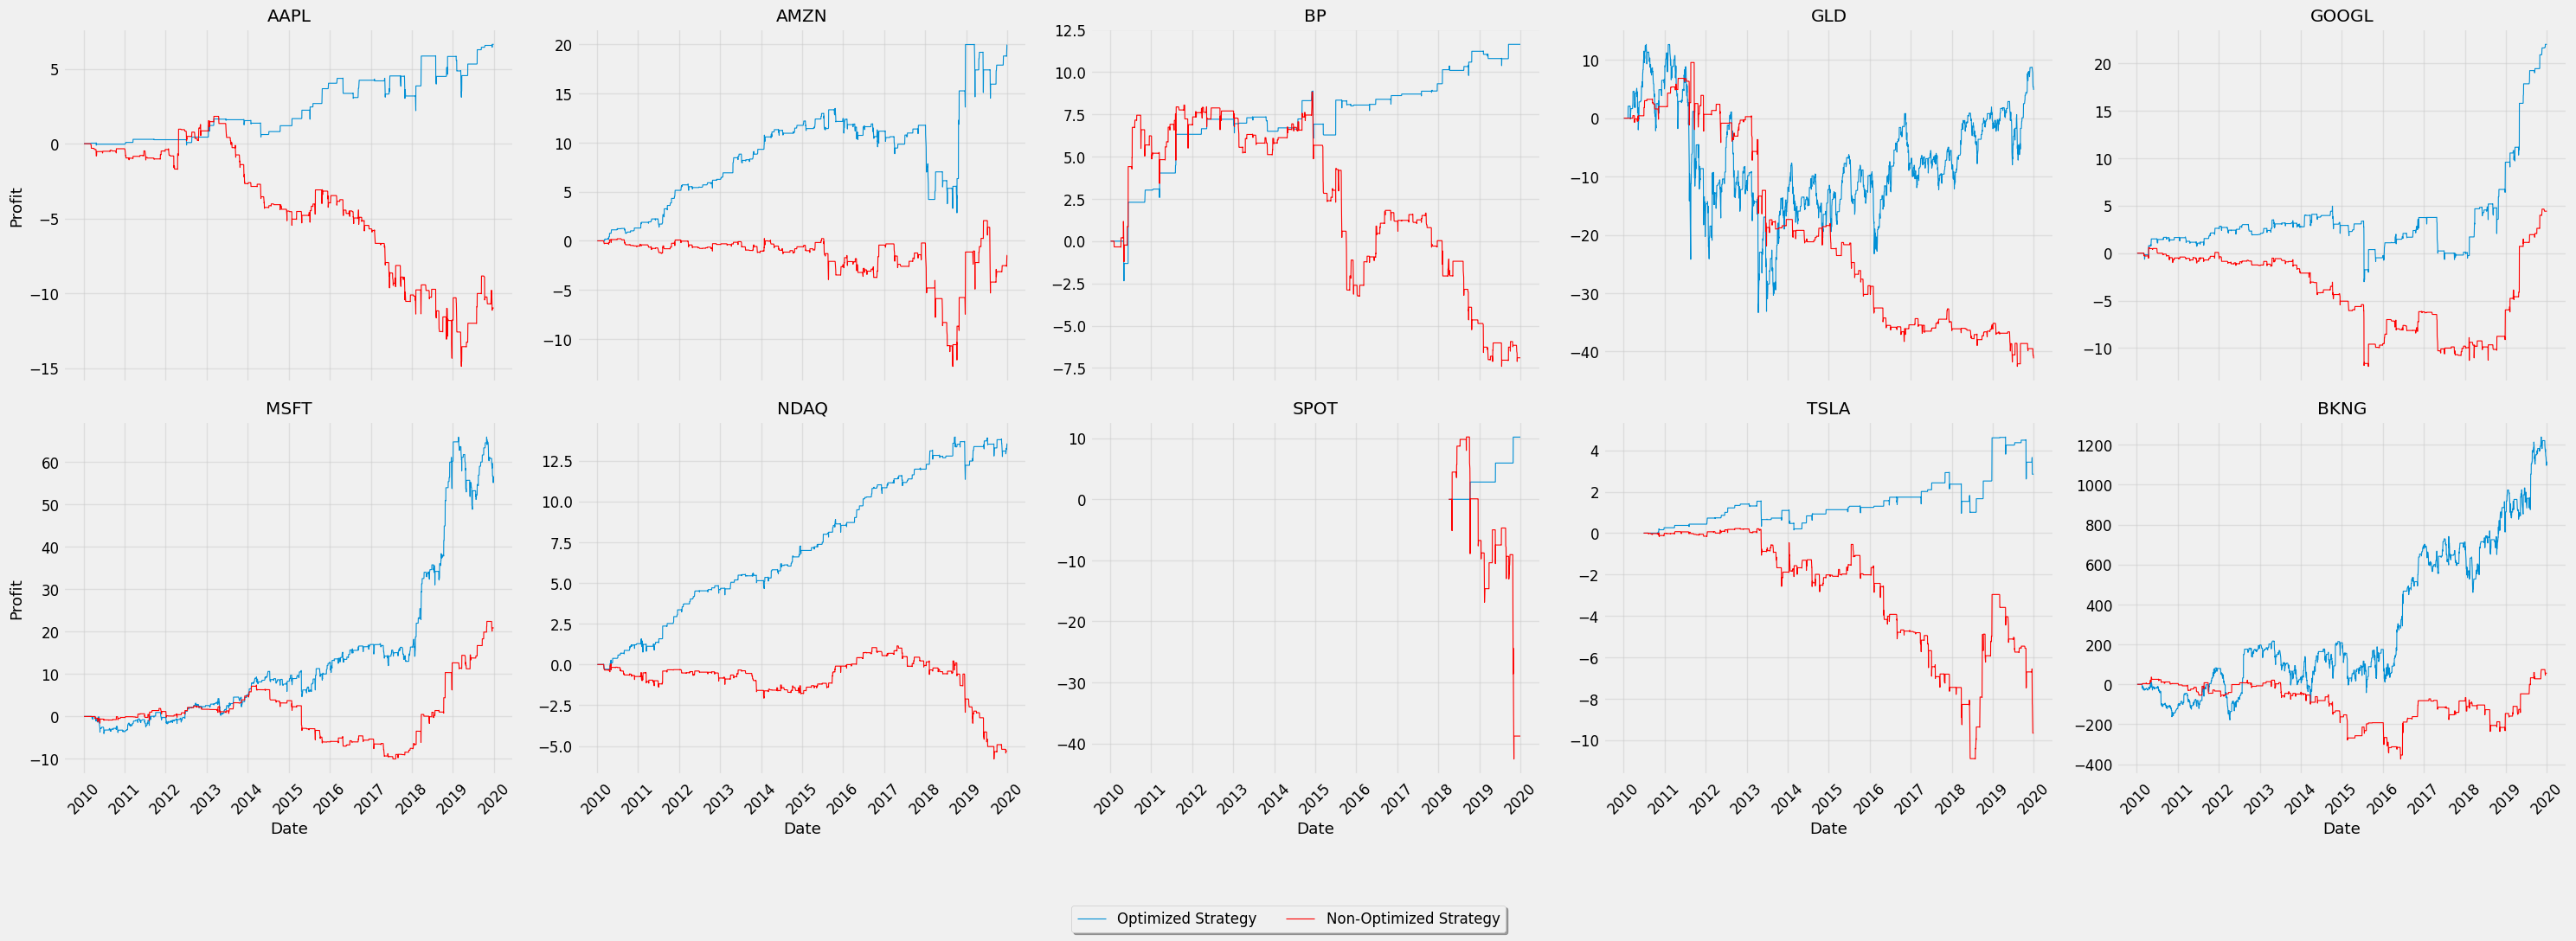

In [ ]:
import matplotlib.pyplot as plt

def plot_strategy_comparison(data_list, tickers, all_optimal_params, all_sharpe_ratios, all_cumulative_profits, titles_list, ncols=5, figsize=(30, 10), fontsize=12):
    nrows = -(-len(data_list) // ncols)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize, sharex=True)
    axs = axs.flatten()

    for i, (ax, data, ticker, optimal_params, best_sharpe_ratio, cumulative_profit, sharpe_ratio, title) in enumerate(zip(axs, data_list, tickers, all_optimal_params, all_sharpe_ratios, all_cumulative_profits, all_sharpe_ratios, titles_list)):
        ax.plot(cumulative_profit, label='Optimized Strategy', lw=0.8)

        df_non_optimized = data[['Close']].copy()
        rez_non_optimized = calculate_bollinger_bands(df_non_optimized, 20, 2, -0.01)
        df_non_optimized = determine_trades(df_non_optimized, stop_loss)  # Pass stop_loss
        non_optimal_cumulative_profit = df_non_optimized['total_profit'].cumsum()

        non_optimal_returns = df_non_optimized['total_profit']
        non_optimal_sharpe_ratio = calculate_sharpe_ratio(non_optimal_returns)

        ax.plot(non_optimal_cumulative_profit, label='Non-Optimized Strategy', lw=0.8, color='red')

        ax.set_title(title, fontsize=fontsize*1.2)
        ax.grid(True, alpha=0.5)

        if i % ncols == 0:
            ax.set_ylabel('Profit', fontsize=fontsize*1.1)


        if i >= (nrows - 1) * ncols:
            ax.set_xlabel('Date', fontsize=fontsize*1.1)

        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.xaxis.set_tick_params(rotation=45)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, fontsize=fontsize, ncol=5)

    plt.tight_layout()
    plt.show()

plot_strategy_comparison(data_list, tickers, all_optimal_params, all_sharpe_ratios, all_cumulative_profits, titles_list)


## Sujungtas pelnas

In [ ]:
for s_df in (data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG):
        s_df['Normalized Return'] = s_df['Adj Close']/s_df.iloc[0]['Adj Close']

In [ ]:
investment = 1000
allocations = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

for s_df, allocation in zip((data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG), allocations):
    s_df['Allocation'] = s_df['Normalized Return'] * allocation
    s_df['Position value'] = s_df['Allocation'] * investment

s_df.head(10)


Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  222.320007  225.300003  221.580002  223.960007  223.388351   
2010-01-05  224.100006  228.000000  222.149994  226.559998  225.981705   
2010-01-06  225.119995  226.419998  218.149994  219.080002  218.520798   
2010-01-07  219.660004  220.500000  214.119995  216.130005  215.578339   
2010-01-08  213.100006  218.429993  212.130005  216.210007  215.658127   
2010-01-11  217.800003  219.500000  212.250000  218.910004  218.351227   
2010-01-12  216.059998  216.990005  210.250000  213.979996  213.433807   
2010-01-13  214.449997  215.919998  207.759995  214.300003  213.753006   
2010-01-14  212.970001  214.729996  206.009995  208.770004  208.237122   
2010-01-15  208.210007  210.500000  205.550003  208.770004  208.237122   

             Volume  Normalized Return  Allocation  Position value  
Date                                                                
2010-01-04   863200           1.000000    0.100000      100.000000  
2010-01-05   801100           1.011609    0.101161      101.160917  
2010-01-06  1007800           0.978210    0.097821       97.821035  
2010-01-07   768700           0.965038    0.096504       96.503841  
2010-01-08   756600           0.965396    0.096540       96.539558  
2010-01-11   784500           0.977451    0.097745       97.745127  
2010-01-12  1222300           0.955438    0.095544       95.543839  
2010-01-13   841000           0.956867    0.095687       95.686729  
2010-01-14  1402500           0.932175    0.093218       93.217538  
2010-01-15  1210900           0.932175    0.093218       93.217538

In [35]:
def combine_position_values(*args, tickers):
    position_values = pd.concat([df['Position value'] for df in args], axis=1)
    position_values.columns = tickers
    return position_values

tickers = ['AAPL', 'AMZN', 'BP', 'GLD', 'GOOGL', 'MSFT', 'NDAQ', 'SPOT', 'TSLA', 'BKNG']
position_values = combine_position_values(data_AAPL, data_AMZN, data_BP, data_GLD, data_GOOGL, data_MSFT, data_NDAQ, data_SPOT, data_TSLA, data_BKNG, tickers=tickers)

position_values['Total position value'] = position_values.sum(axis=1)
position_values.head()

AAPL        AMZN          BP         GLD       GOOGL  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.172904  100.589989  100.710101   99.908920   99.559634   
2010-01-06   98.579521   98.767737  101.234127  101.557376   97.049863   
2010-01-07   98.397270   97.087376  101.200375  100.928959   94.790586   
2010-01-08   99.051436   99.716205  101.437064  101.429872   96.054254   

                  MSFT        NDAQ  SPOT  TSLA        BKNG  \
Date                                                         
2010-01-04  100.000000  100.000000   NaN   NaN  100.000000   
2010-01-05  100.032332  100.296448   NaN   NaN  101.160917   
2010-01-06   99.418432  100.247006   NaN   NaN   97.821035   
2010-01-07   98.384505   98.913041   NaN   NaN   96.503841   
2010-01-08   99.062996   99.950558   NaN   NaN   96.539558   

            Total position value  
Date                              
2010-01-04            800.000000  
2010-01-05            802.431245  
2010-01-06            794.675098  
2010-01-07            786.205952  
2010-01-08            793.241943

Text(0, 0.5, 'Price')

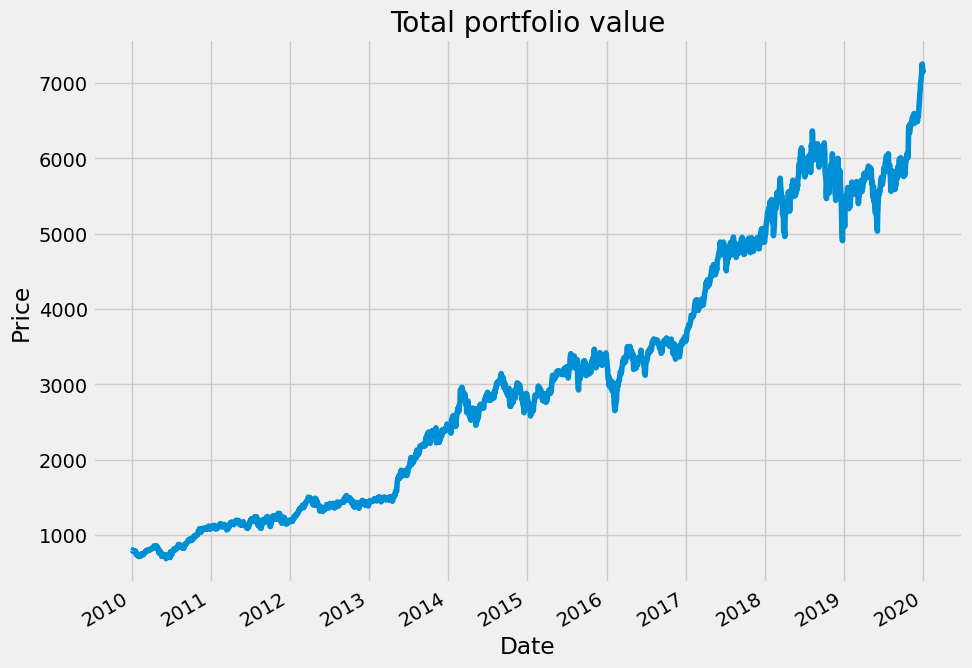

In [ ]:
position_values['Total position value'].plot(figsize=(10,8))
plt.title('Total portfolio value')
plt.ylabel('Price')

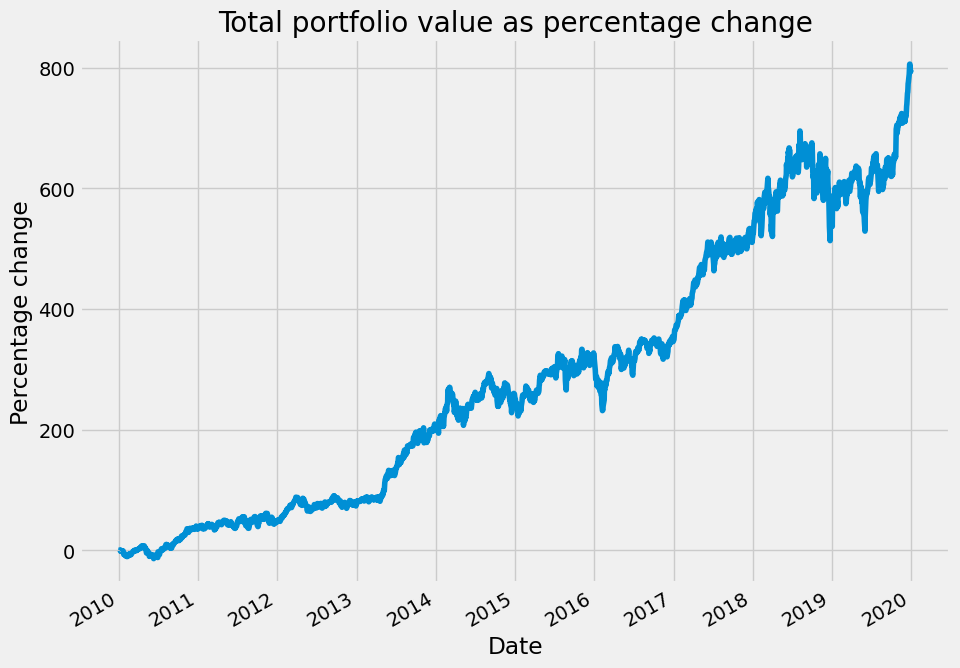

In [ ]:
# Paimame pirmąją bendros portfelio vertės vertę
initial_portfolio_value = position_values['Total position value'].iloc[0]

# Apskaičiuojame kiekvienos dienos bendros portfelio vertės procentinį pokytį nuo pradinės vertės
portfolio_value_percent = (position_values['Total position value'] / initial_portfolio_value - 1) * 100

portfolio_value_percent.plot(figsize=(10, 8))
plt.title('Total portfolio value as percentage change')
plt.ylabel('Percentage change')
plt.xlabel('Date')
plt.show()


Text(0, 0.5, 'Price')

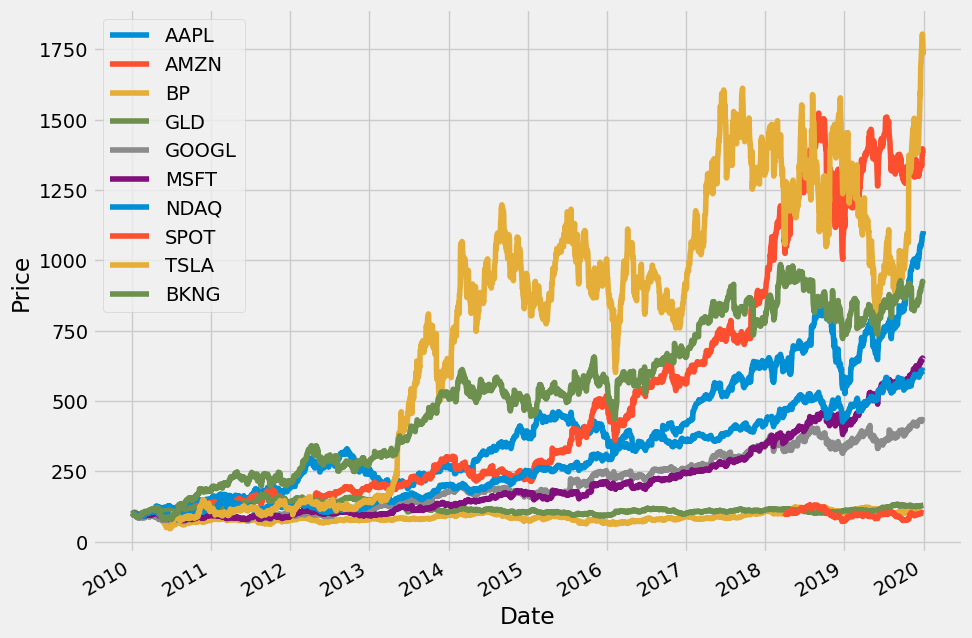

In [ ]:
position_values.drop('Total position value',axis=1).plot(figsize=(10,8))
plt.ylabel('Price')

In [ ]:
position_values['Daily return'] = position_values['Total position value'].pct_change(1)
position_values.head()

AAPL        AMZN          BP         GLD       GOOGL  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.172904  100.589989  100.710101   99.908920   99.559634   
2010-01-06   98.579521   98.767737  101.234127  101.557376   97.049863   
2010-01-07   98.397270   97.087376  101.200375  100.928959   94.790586   
2010-01-08   99.051436   99.716205  101.437064  101.429872   96.054254   

                  MSFT        NDAQ  SPOT  TSLA        BKNG  \
Date                                                         
2010-01-04  100.000000  100.000000   NaN   NaN  100.000000   
2010-01-05  100.032332  100.296448   NaN   NaN  101.160917   
2010-01-06   99.418432  100.247006   NaN   NaN   97.821035   
2010-01-07   98.384505   98.913041   NaN   NaN   96.503841   
2010-01-08   99.062996   99.950558   NaN   NaN   96.539558   

            Total position value  Daily return  
Date                                            
2010-01-04            800.000000           NaN  
2010-01-05            802.431245      0.003039  
2010-01-06            794.675098     -0.009666  
2010-01-07            786.205952     -0.010657  
2010-01-08            793.241943      0.008949

In [ ]:
mean = position_values['Daily return'].mean()
std = position_values['Daily return'].std()
print(mean)
print(std)


sharpe_r = position_values['Daily return'].mean()/position_values['Daily return'].std()
print(sharpe_r)

annual_sharpe_r = sharpe_r * (252**0.5)
print(annual_sharpe_r)


0.0009614911095283283
0.013365523809020619
0.071938153959922
1.14198279093018


## Koreliacijų matrica

Pagal turimų akcijų kainų pokyčius

In [ ]:
def calculate_returns(tickers, data):
    Normed = pd.DataFrame()
    for name in tickers:
        Normed[name + 'normed'] = data[name]['Adj Close'] / data[name]['Adj Close'].iloc[0]

    returns = pd.DataFrame()
    for name in tickers:
        returns[name] = data[name]['Close'].pct_change()

    return Normed, returns

tickers = ['AAPL', 'AMZN', 'BP', 'GLD', 'GOOGL', 'MSFT', 'NDAQ', 'SPOT', 'TSLA', 'BKNG']
Normed, returns = calculate_returns(tickers, data)


In [ ]:
corr = returns.corr()
corr.style.background_gradient(cmap='crest')

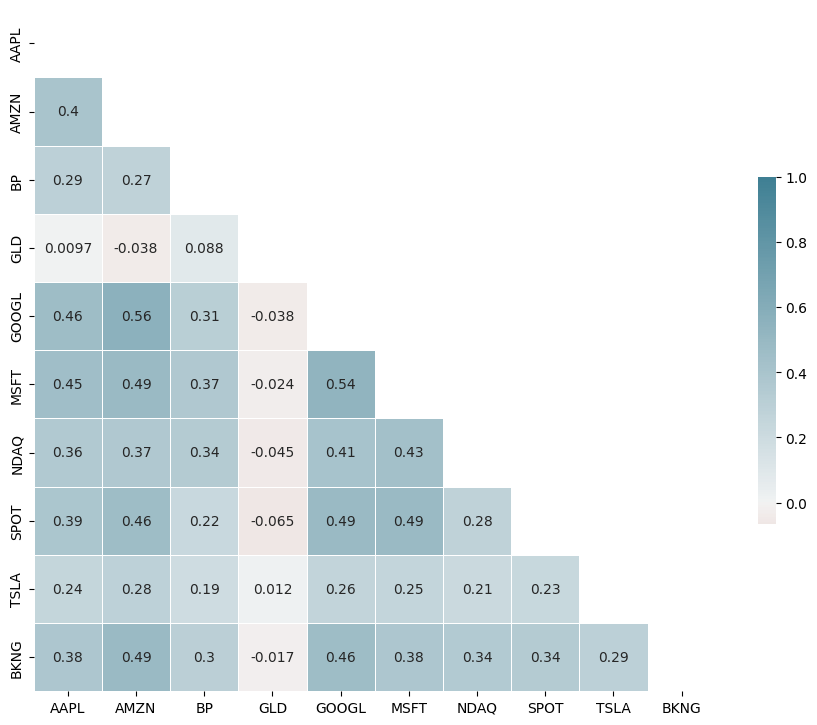

In [ ]:
plt.style.use('default')
def plot_heatmap(corr, mask=None, cmap='crest', annot=True, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, figsize=(11, 9)):
    if mask is None:
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        annot=annot,
        vmax=vmax,
        center=center,
        square=square,
        linewidths=linewidths,
        cbar_kws=cbar_kws
    )
    plt.show()

plot_heatmap(corr, cmap=sns.diverging_palette(20, 220, as_cmap=True))

## Koreliacijų matrica pagal dienines strategijų grąžas

Koreliacijos su prekybos kaštais

In [ ]:
daily_returns = []

for df in dfs:
    df['daily_return'] = df['total_profit'].pct_change()
    daily_returns.append(df['daily_return'])

returns_df = pd.concat(daily_returns, axis=1)
returns_df.columns = tickers
correlation_matrix = returns_df.corr()

correlation_matrix.style.background_gradient(cmap='crest')

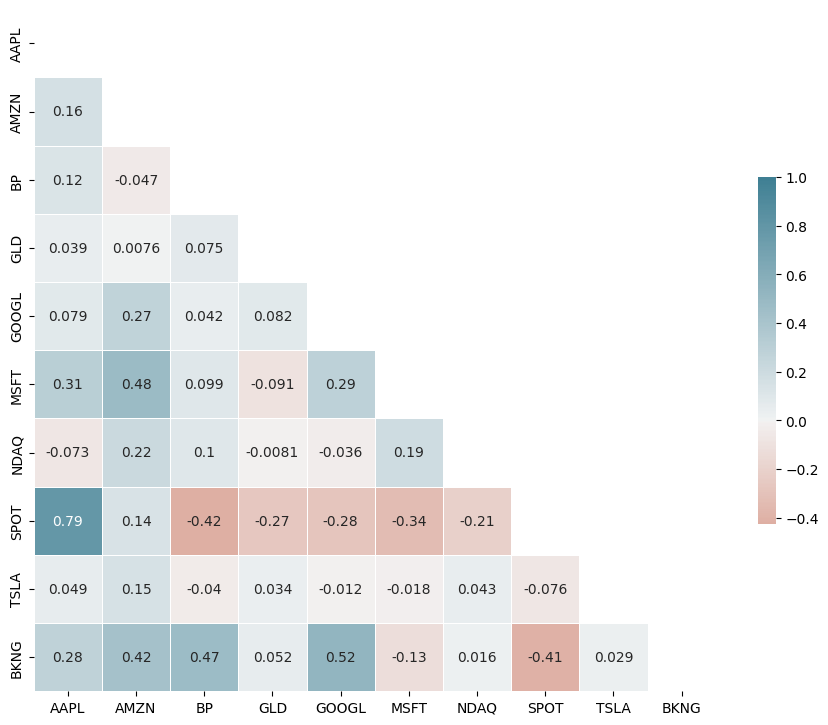

In [ ]:
plot_heatmap(correlation_matrix, cmap=sns.diverging_palette(20, 220, as_cmap=True))